<a href="https://colab.research.google.com/github/Astridgiraldo/RH/blob/main/SEL_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#importamos las librerías necesarias
import pandas as pd
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, classification_report
from sklearn.feature_selection import SelectFromModel, f_classif, SelectKBest
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [30]:
#Conexión a Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#Carga de BD desde drive

r_2015 ='/content/drive/MyDrive/analitica3/base_datos/r_2015_e.csv'
r_2016 ='/content/drive/MyDrive/analitica3/base_datos/r_2016_e.csv'

r_2015 = pd.read_csv(r_2015)
r_2016 = pd.read_csv(r_2016)

pd.set_option('display.max_columns', None) #muestra todas las columnas de tablas

In [32]:
#cambiamos el nombre de la variable objetivo a target
r_2015 = r_2015.rename(columns = {'attrition' : 'target'})
 #renombramos la variable objetivo
y2015 = r_2015.target
# LabelEncoder: Transformarmos la variable objetivo en numérica.
le = LabelEncoder()
y2015 = le.fit_transform(y2015)

print(y2015[0:5])

print(le.classes_)

[0 0 0 0 0]
['No' 'Yes']


In [33]:
#cambiamos el nombre de la variable objetivo a target
r_2016 = r_2016.rename(columns = {'attrition' : 'target'})
 #renombramos la variable objetivo
y2016 = r_2016.target
# LabelEncoder: Transformarmos la variable objetivo en numérica.
le = LabelEncoder()
y2016 = le.fit_transform(y2016)

print(y2016[0:5])

print(le.classes_)

[0 1 0 0 0]
['No' 'Yes']


In [34]:
#Se eliminan columnas con índices que no sirven al caso de estudio

r_2015=r_2015.drop(['Unnamed: 0'],axis=1)
r_2016=r_2016.drop(['Unnamed: 0'],axis=1)

##**IDENTIFICACIÓN DE VARIABLES CATEGÓRICAS EN OTRAS BD**

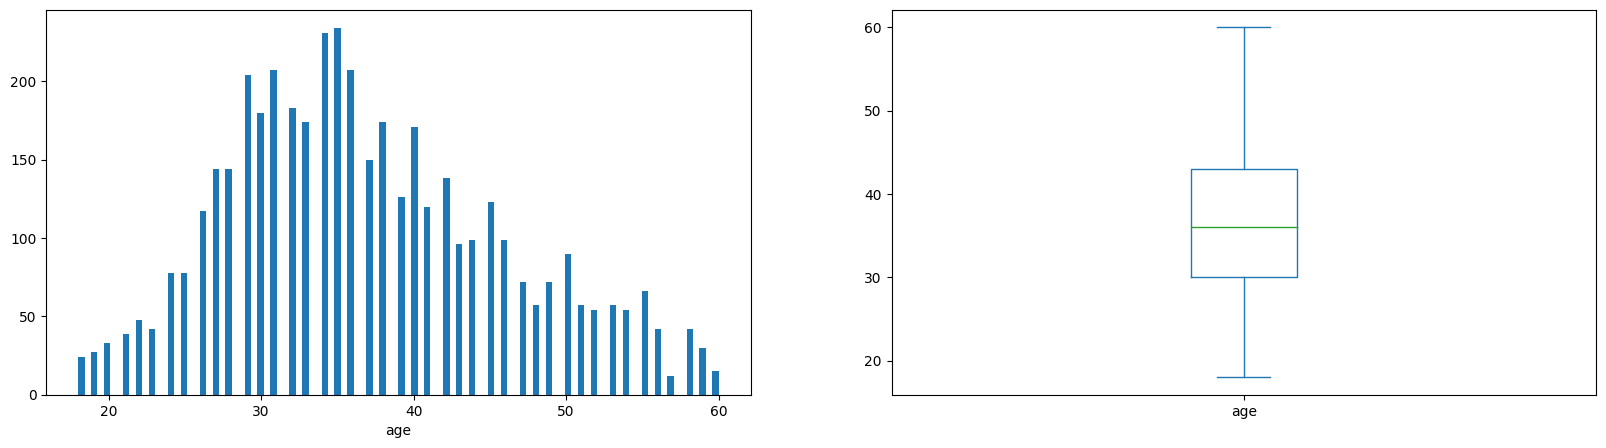

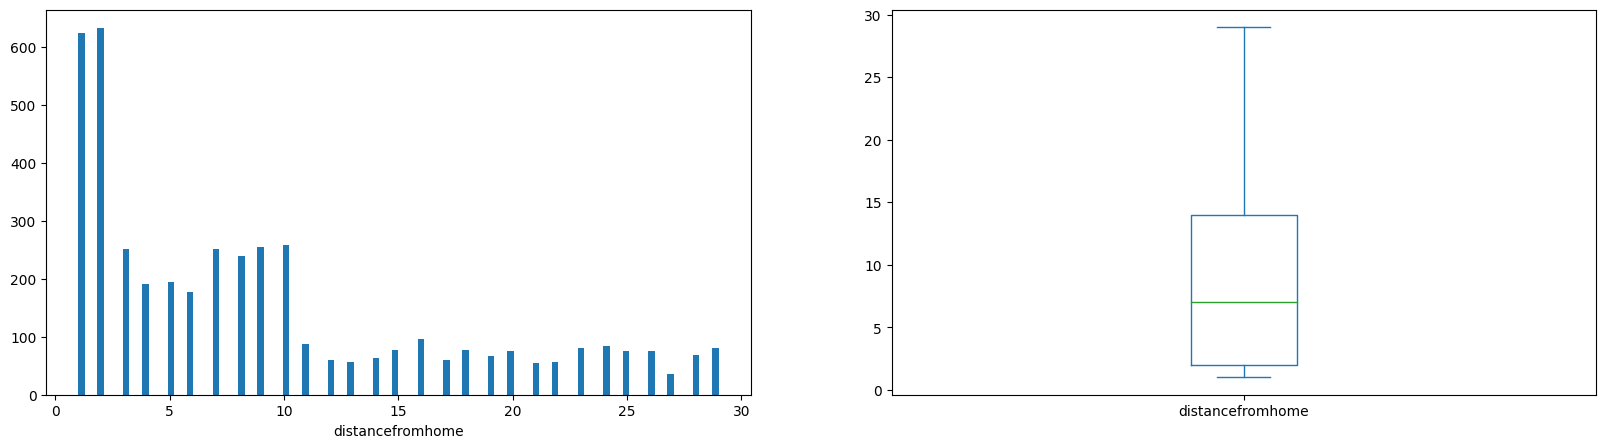

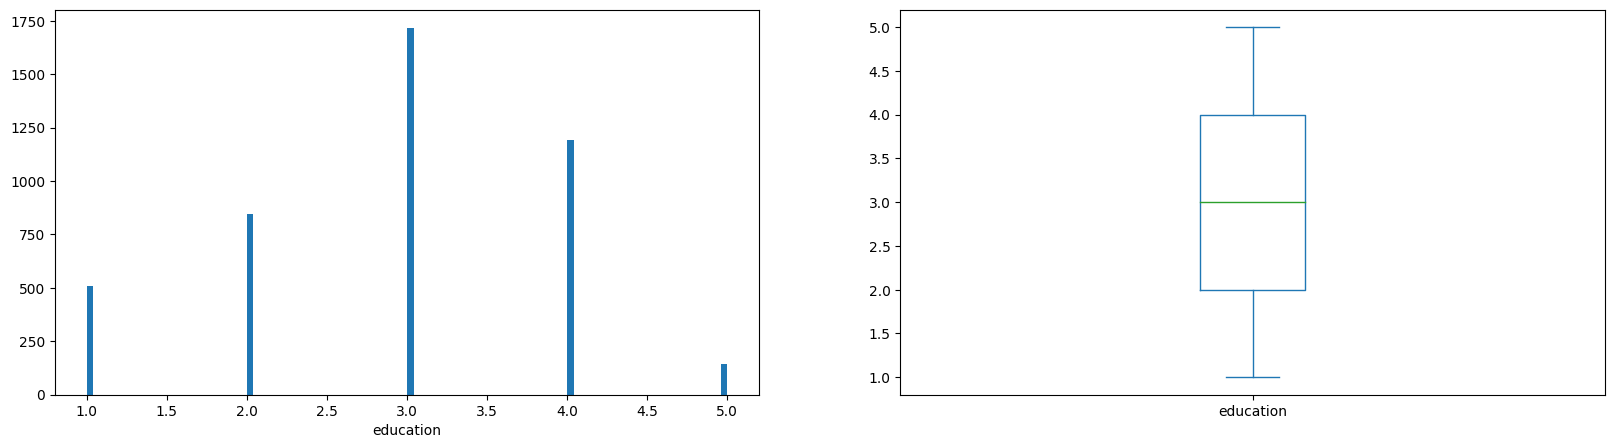

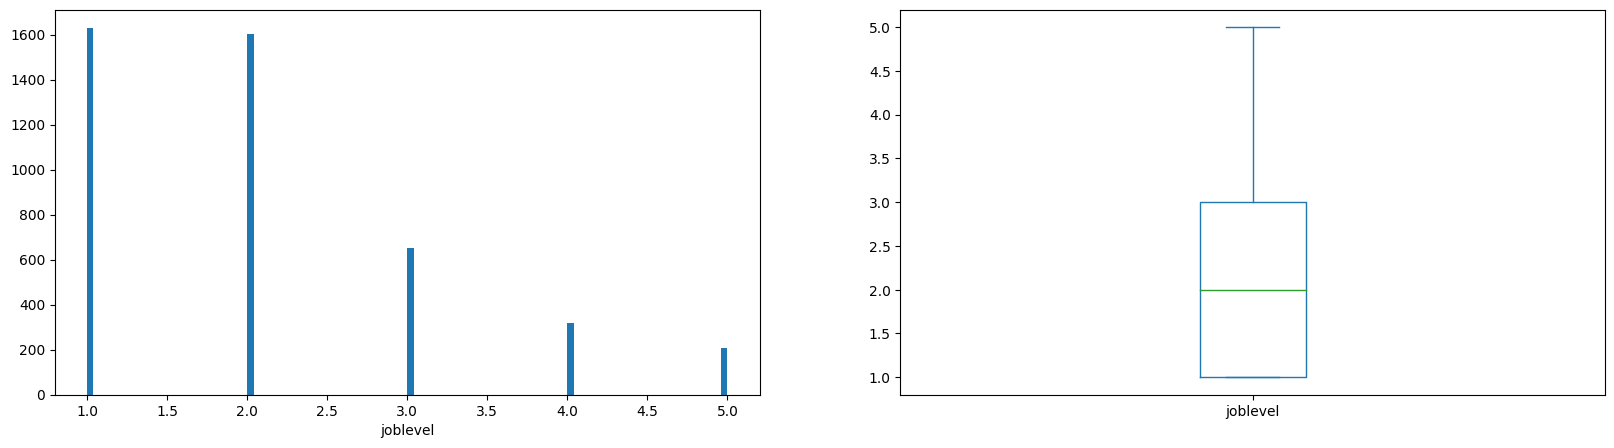

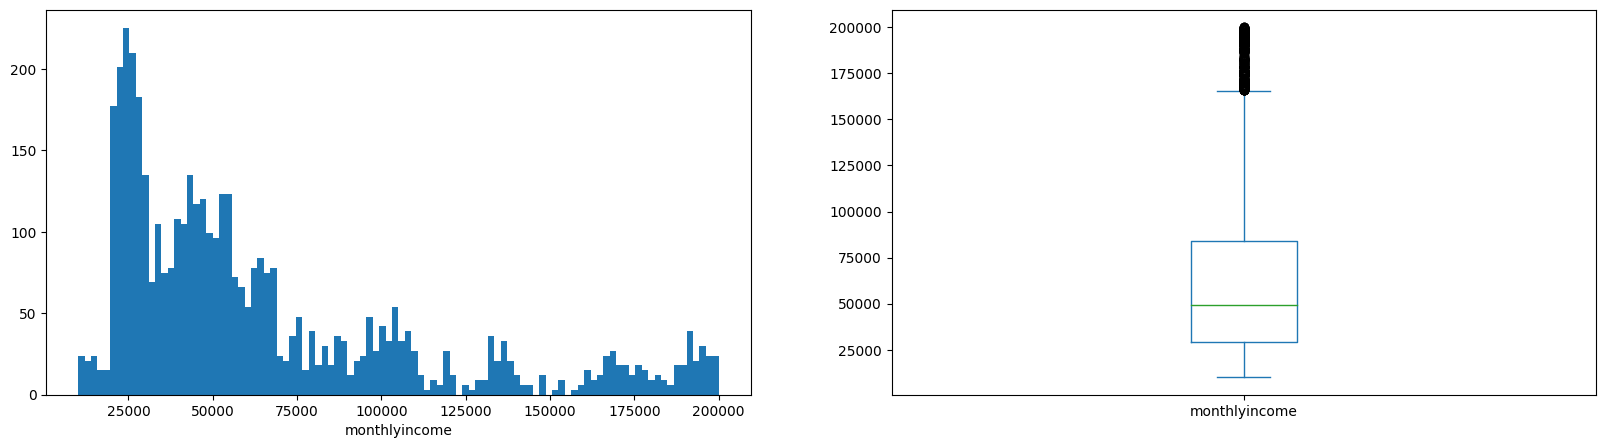

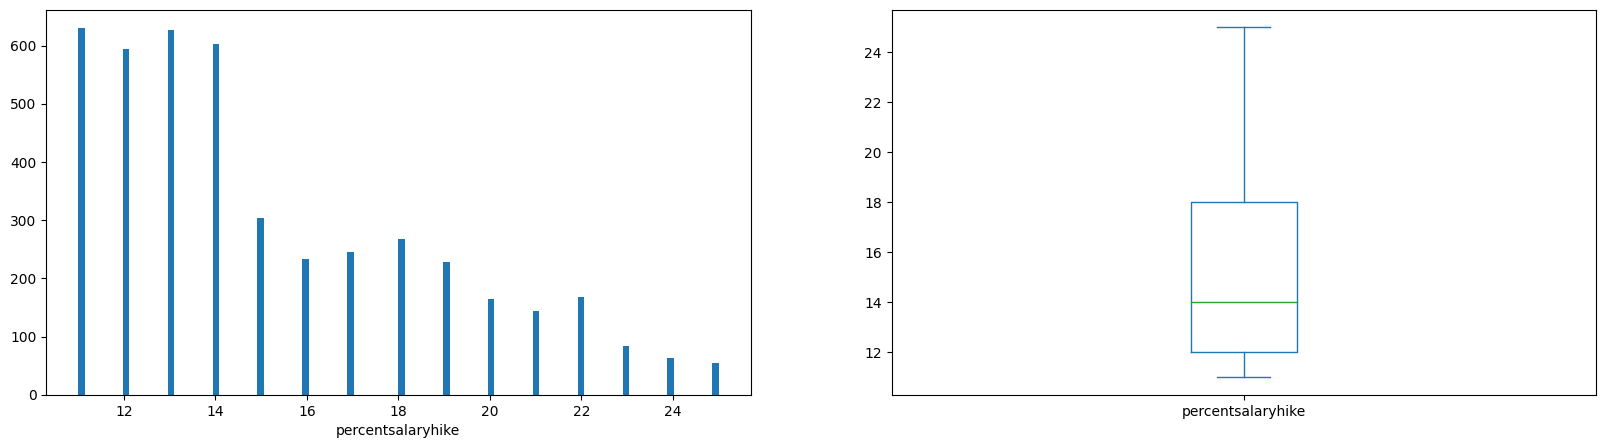

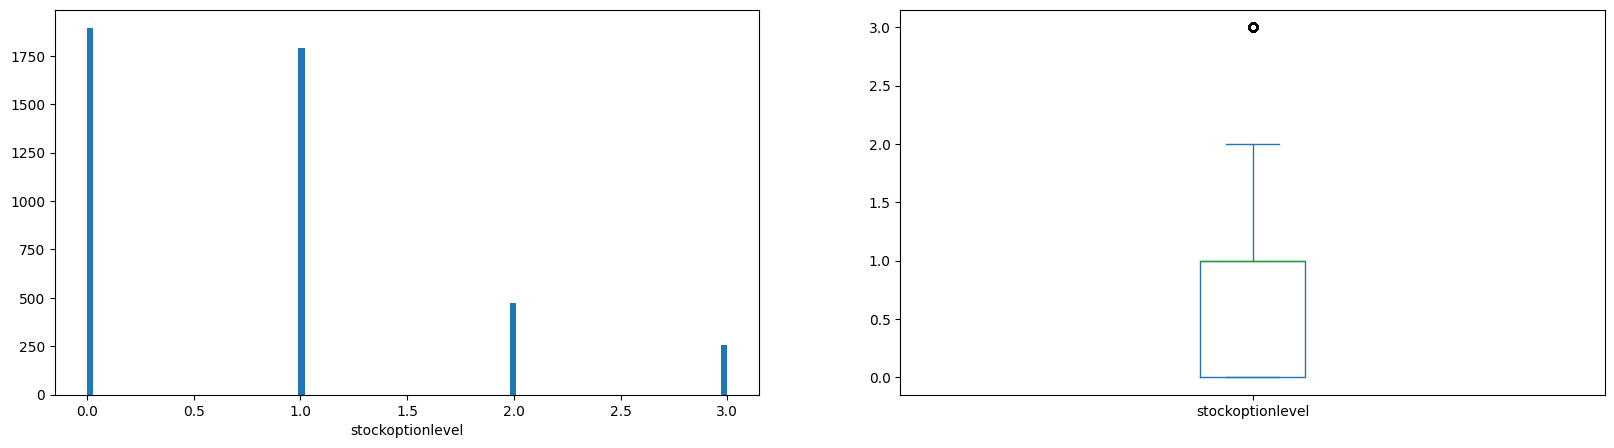

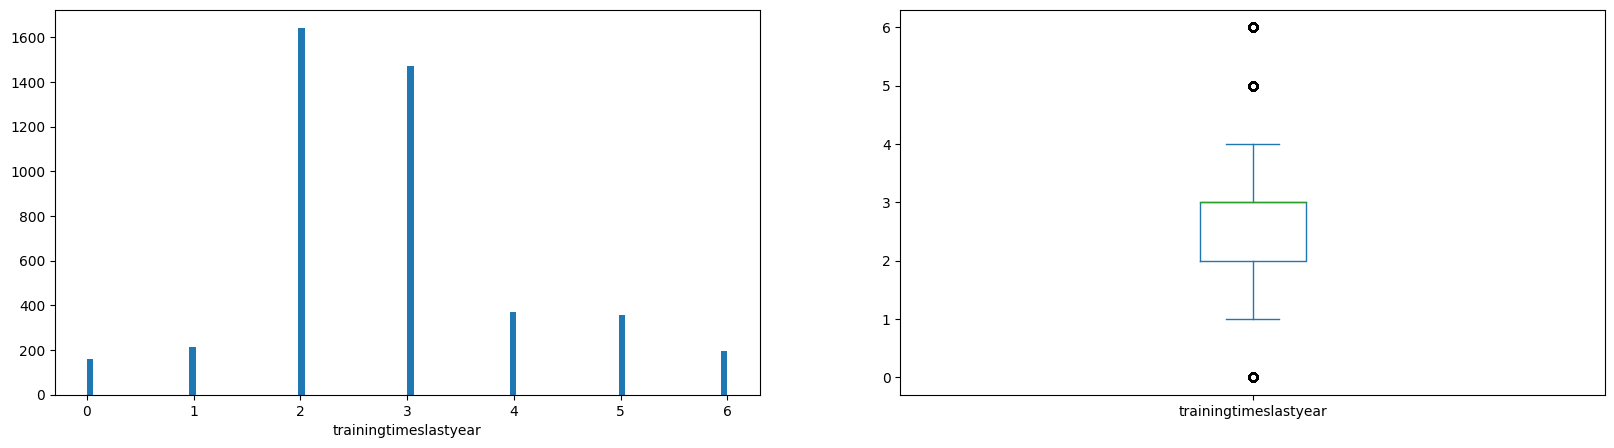

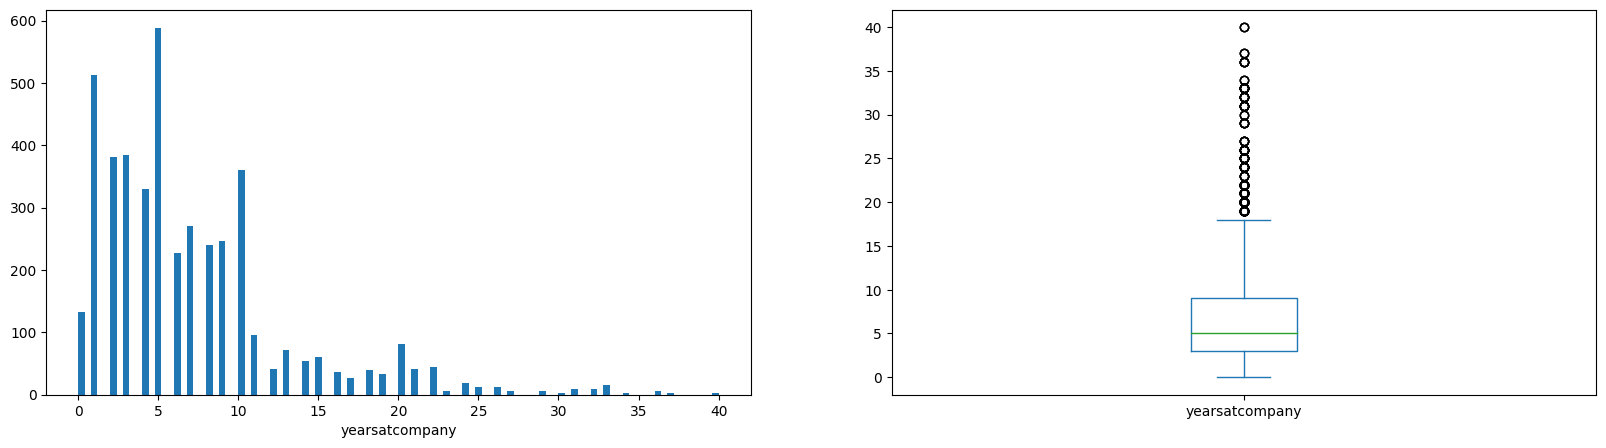

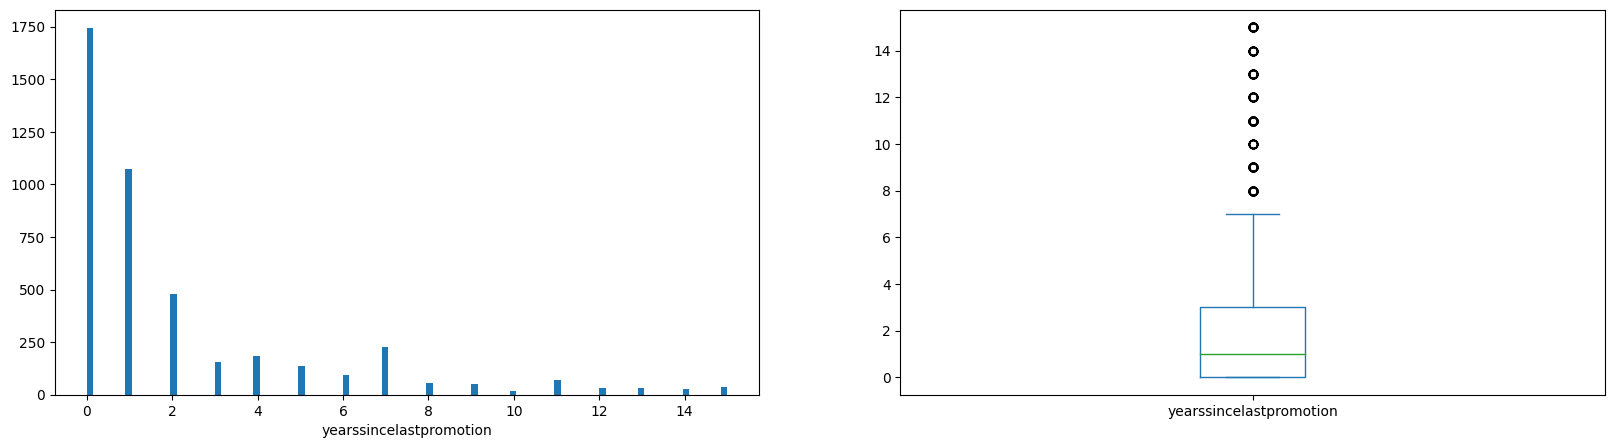

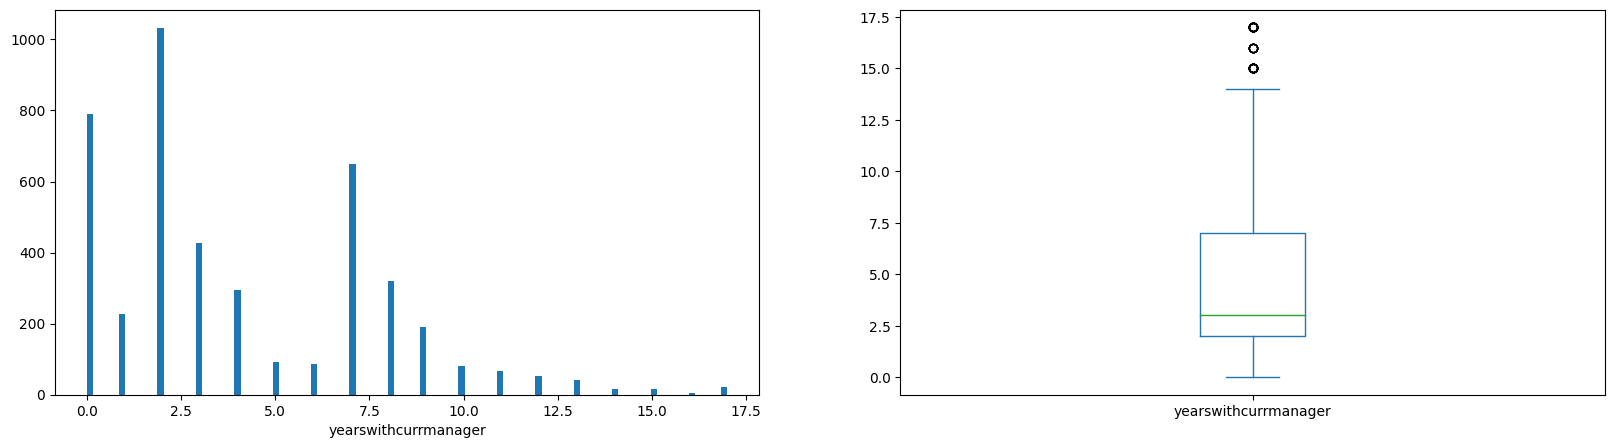

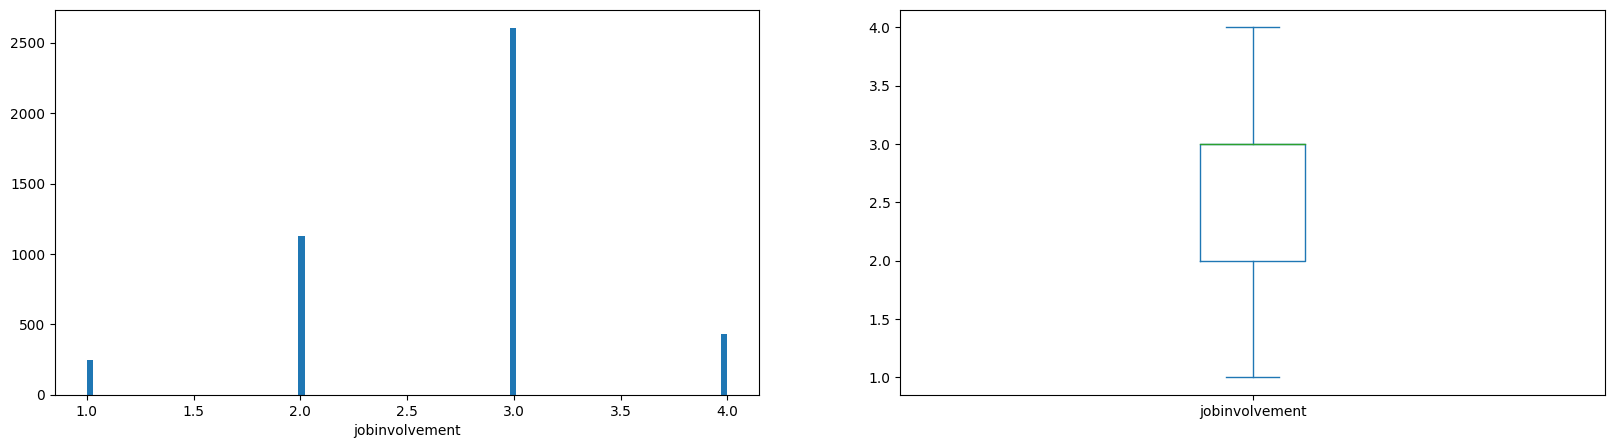

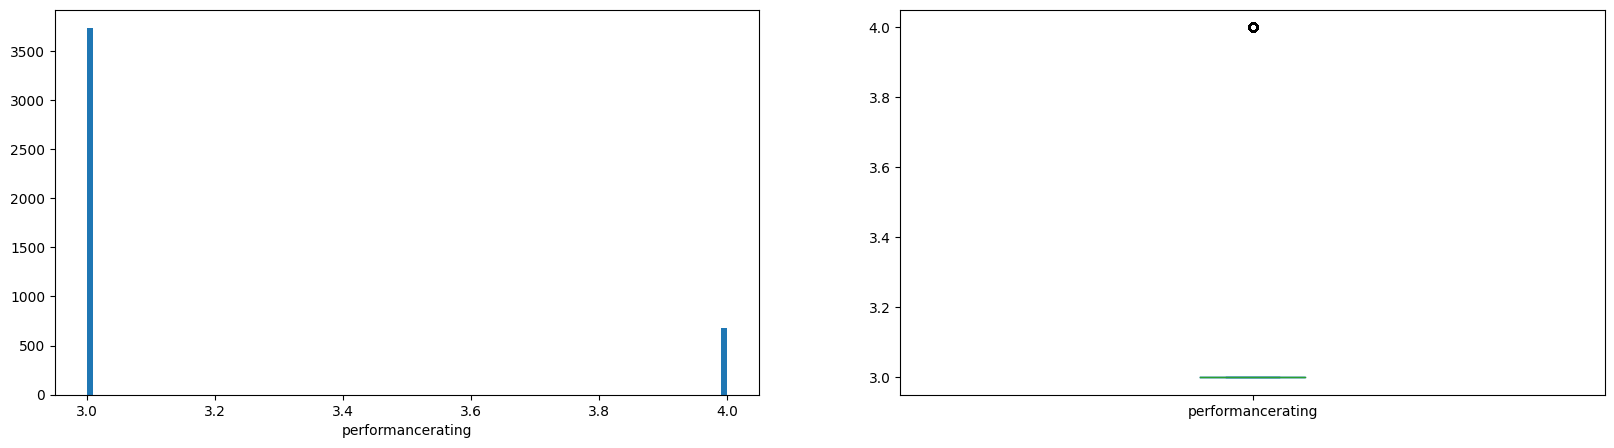

In [35]:
#COLUMNAS NUMERICAS ENTERAS
X_int2015=r_2015.select_dtypes(include=['int64'])
# X_int

for variable in X_int2015:
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_int2015[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_int2015[variable].plot(kind='box')

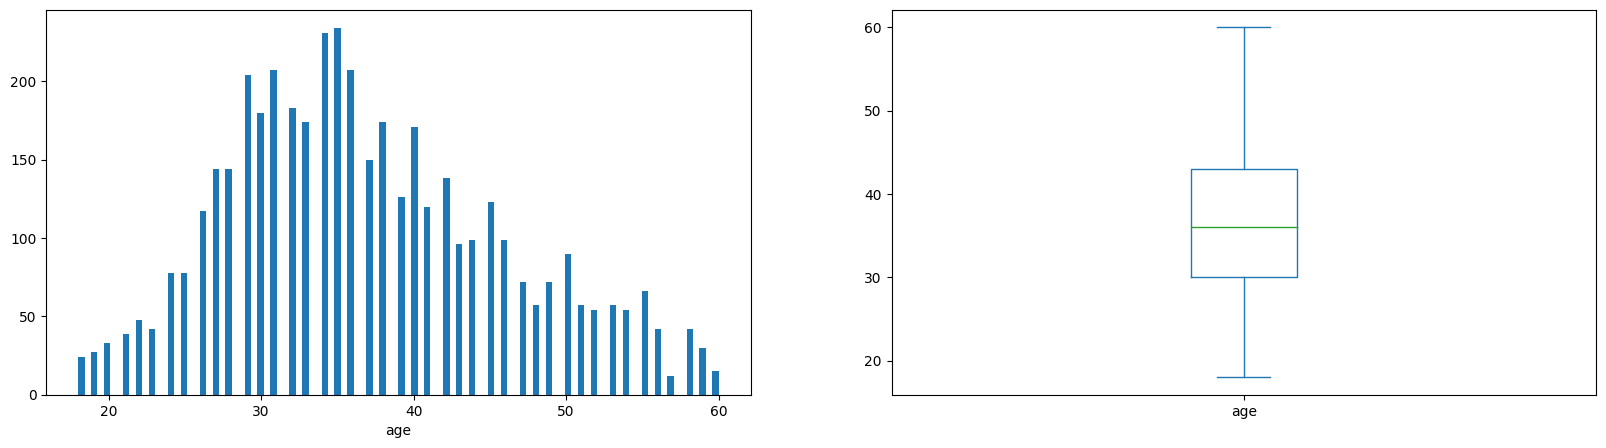

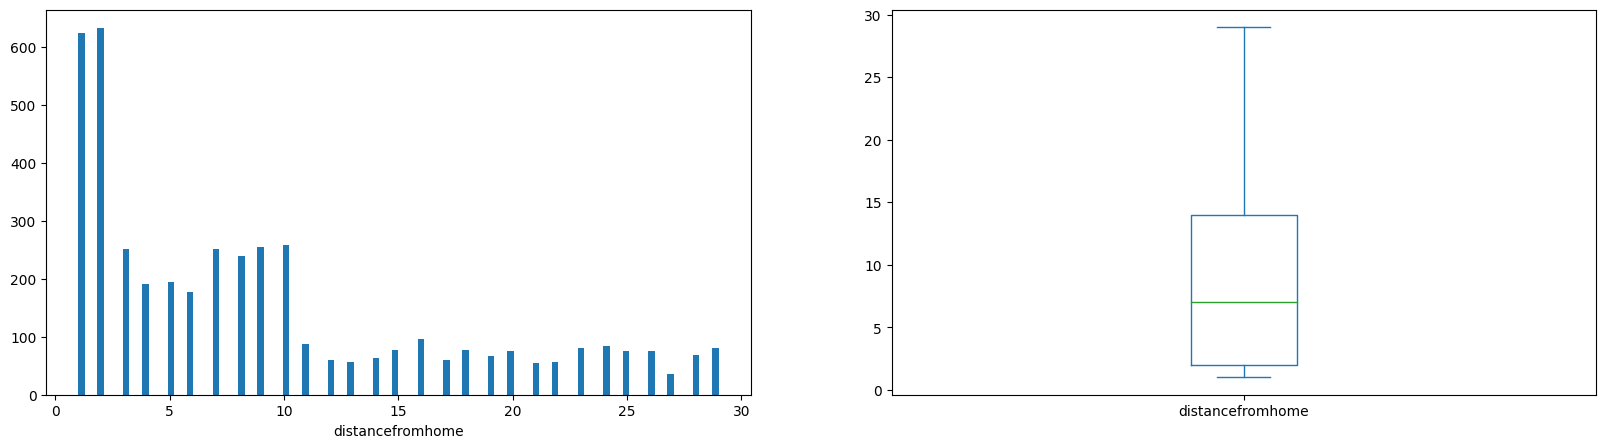

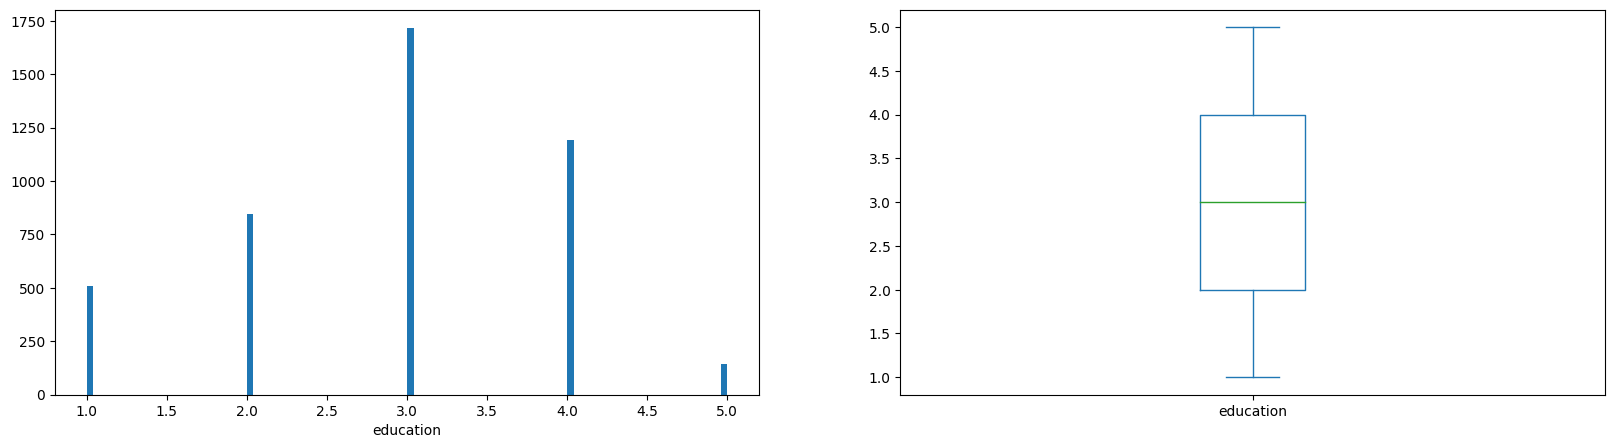

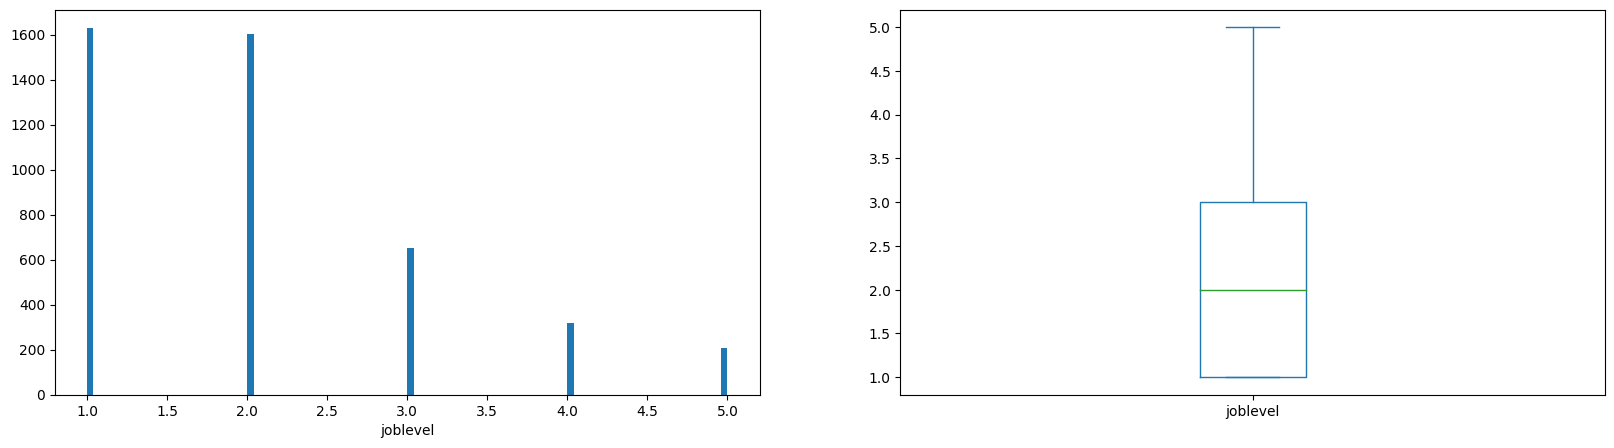

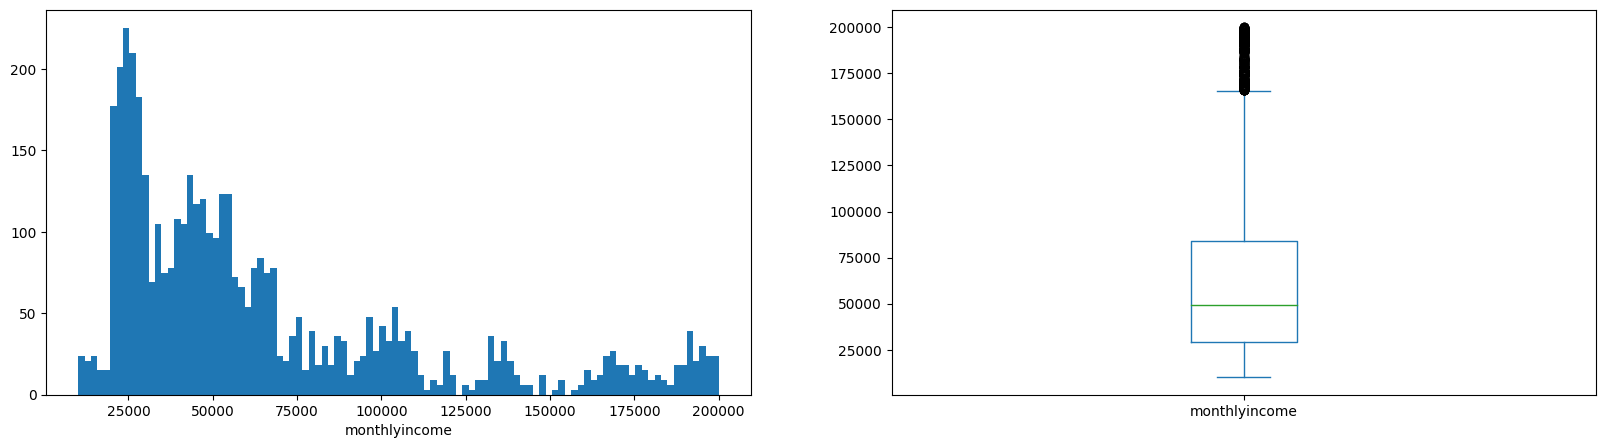

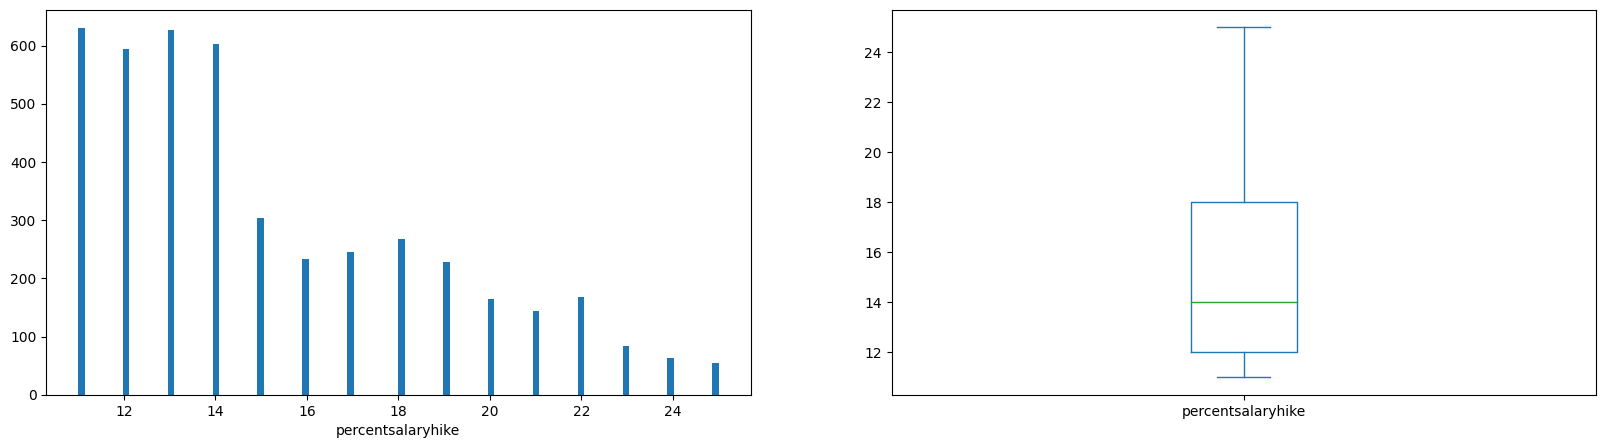

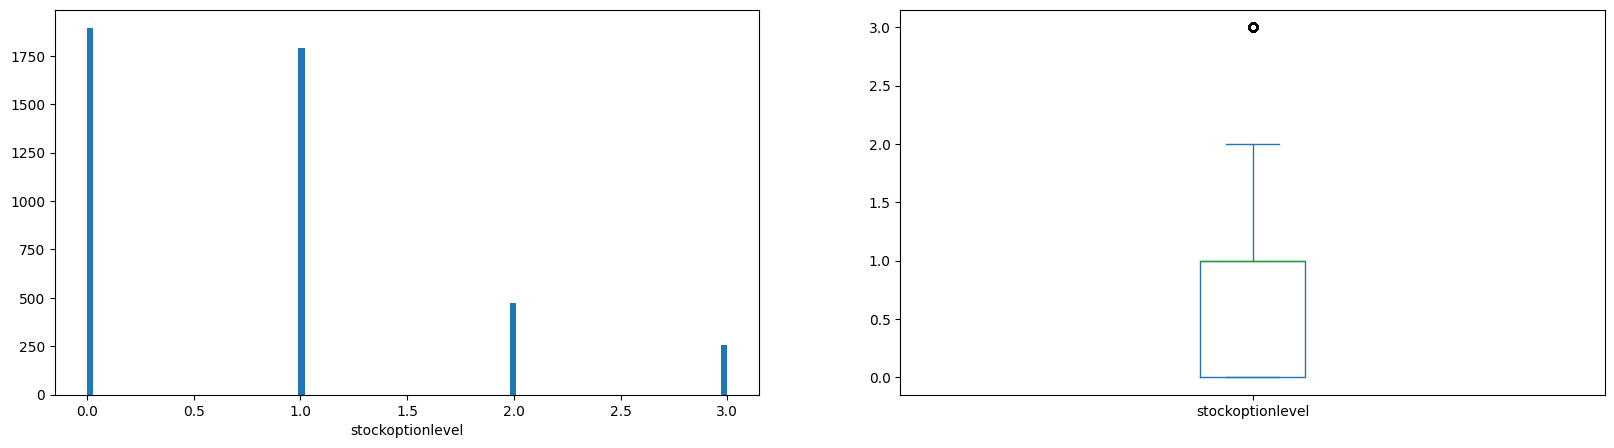

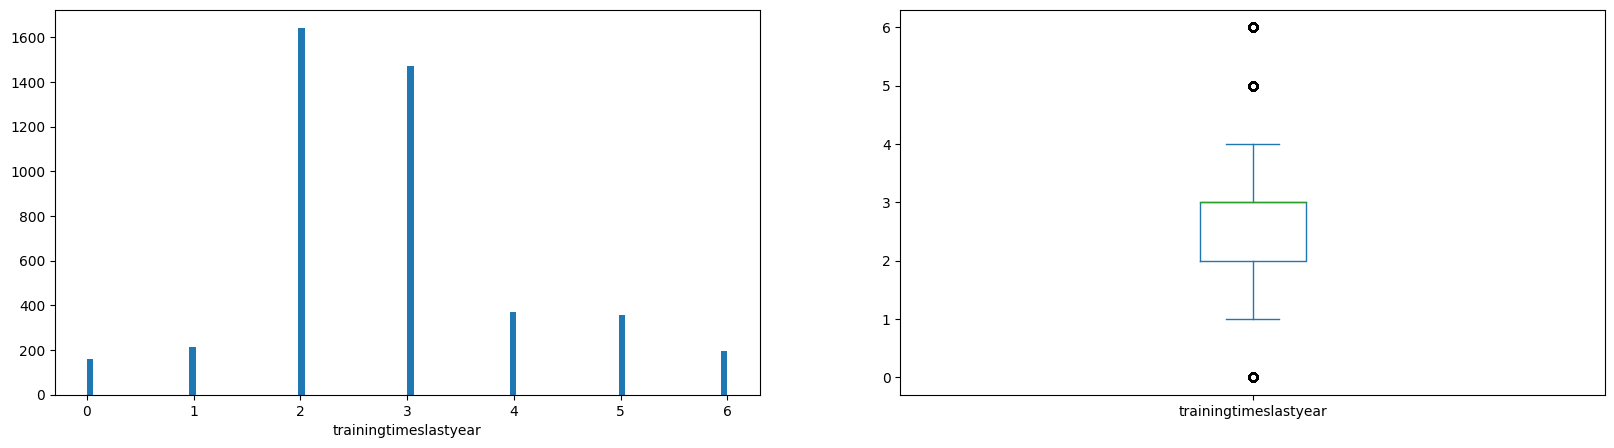

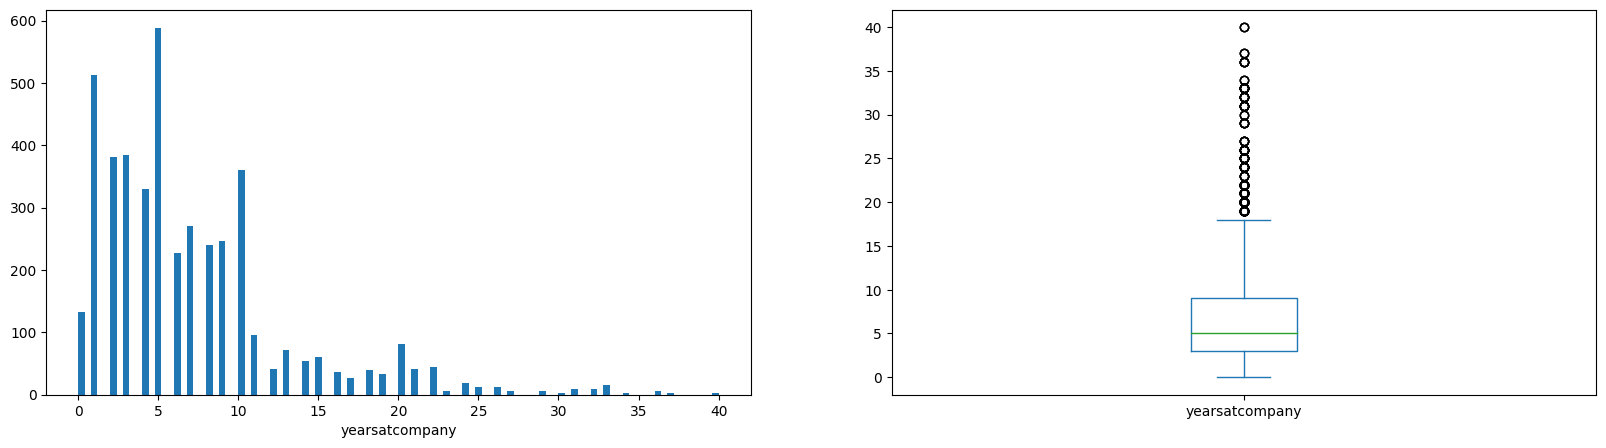

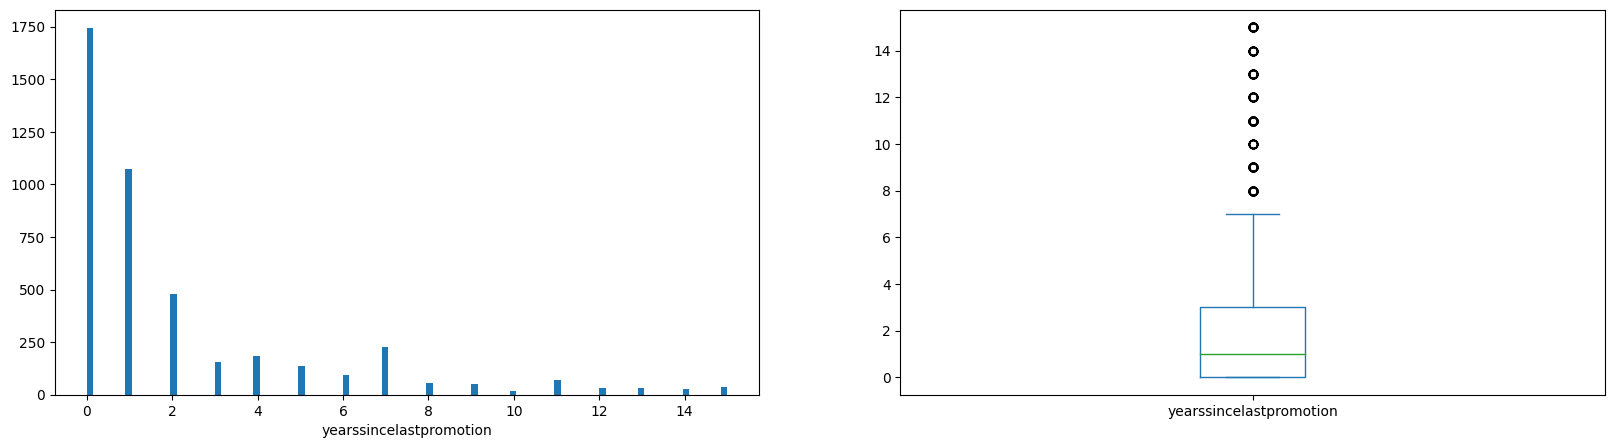

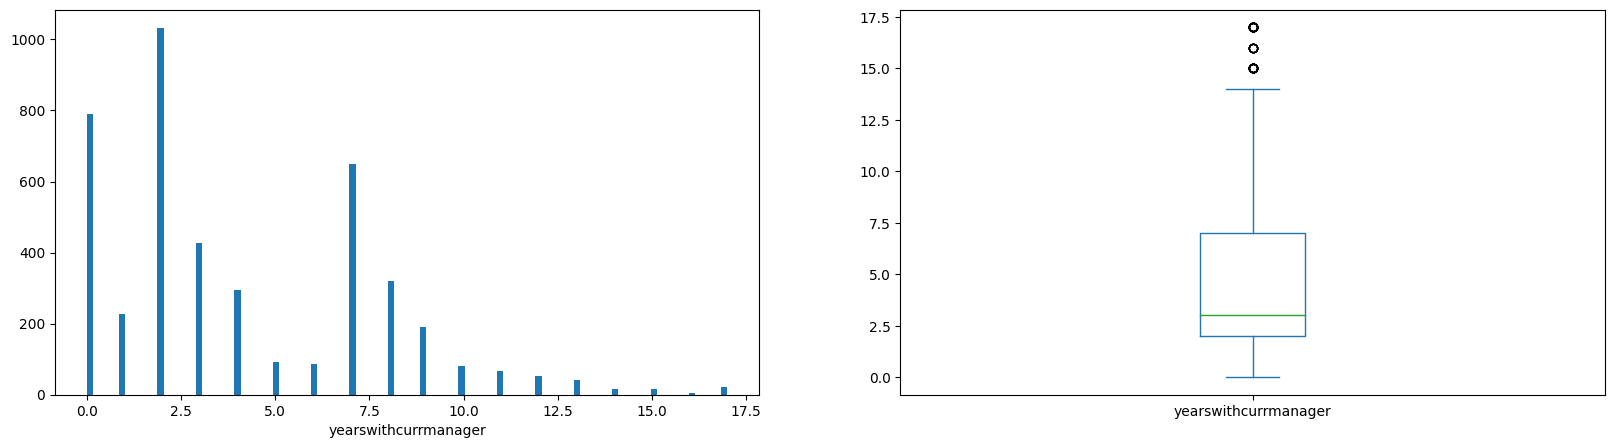

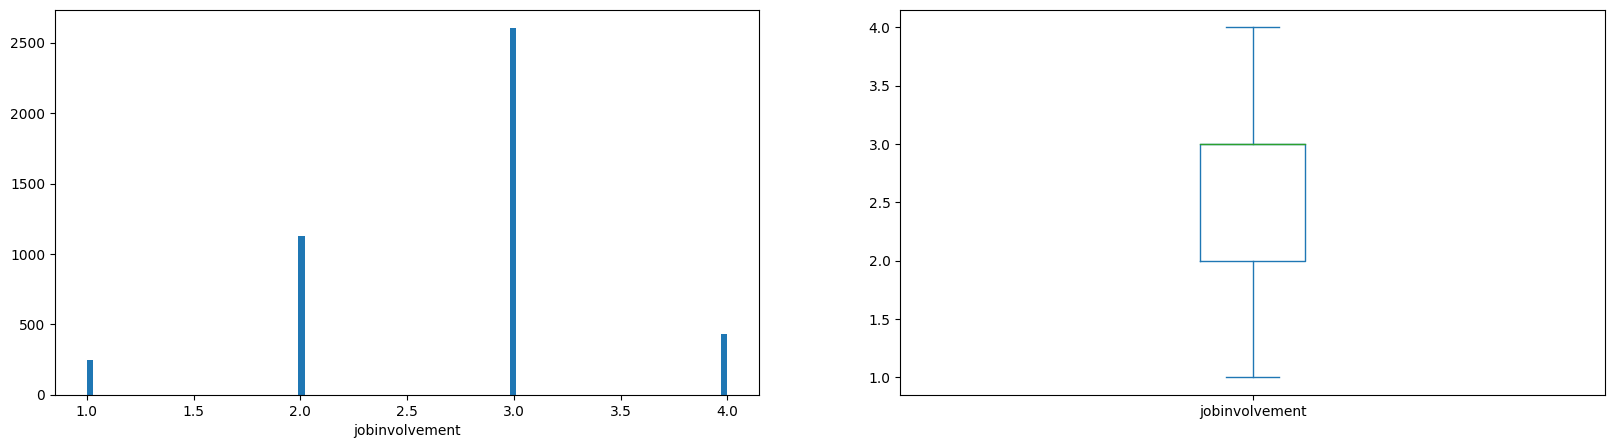

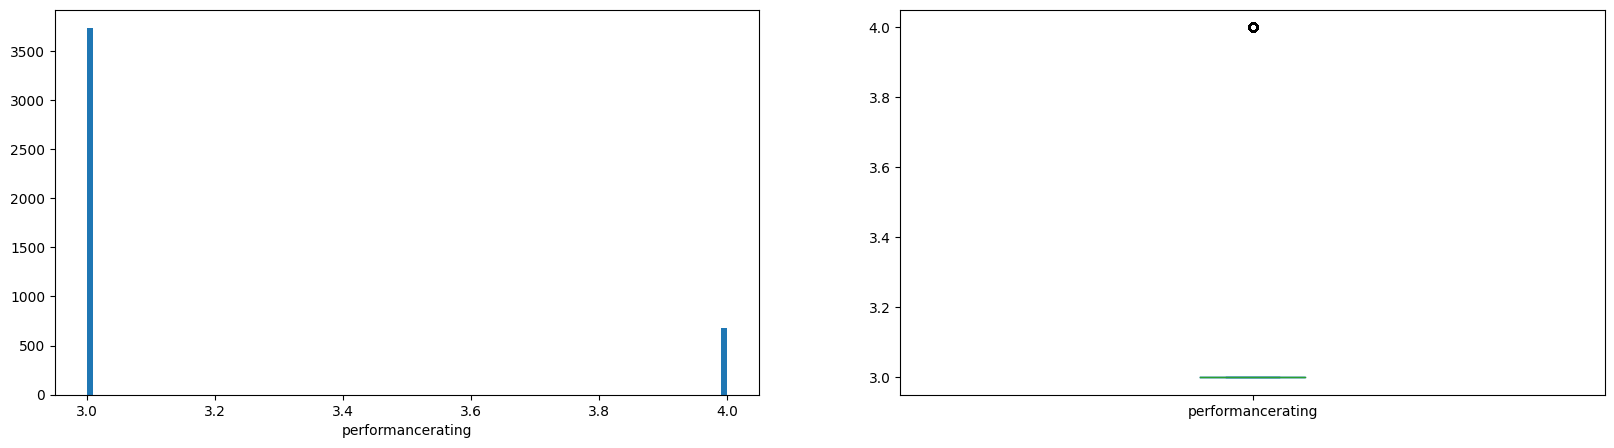

In [36]:
#COLUMNAS NUMERICAS ENTERAS
X_int2016=r_2016.select_dtypes(include=['int64'])
# X_int


for variable in X_int2016:
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_int2016[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_int2016[variable].plot(kind='box')

**De acuerdo a las gráficas se puede notar que las variables "stockoptionlevel", "performancerating", "jobinvolvement", "joblevel", "education" tienen comportamiento de variables categóricas**

**Guardado de variables numéricas con comportamiento categórico en la BD de las categóricas**

In [37]:
##De los histogramas se observa que las siguientes variables se comportan como variables categoricas, por tanto se deben codificar y posteriormente agregar a la base de categoricas.
t2015=pd.concat([X_int2015["stockoptionlevel"],X_int2015["performancerating"],X_int2015["jobinvolvement"],X_int2015["joblevel"],X_int2015["education"]],axis=1)
t2015=t2015.astype(str)
t2015=pd.get_dummies(t2015)
X_object_t2015=pd.concat([X_int2015, t2015], axis=1)
#veamos las categorias de estas variables
print("Categorias de StockOptionLevel: ", X_int2015["stockoptionlevel"].unique())
print("Categorias de PerformanceRating: ", X_int2015["performancerating"].unique())
print("Categorias de JobInvolvement: ", X_int2015["jobinvolvement"].unique())
print("Categorias de JobLevel: ", X_int2015["joblevel"].unique())
print("Categorias de Education: ", X_int2015["education"].unique())
print("Categorias de TrainingTimesLastYear: ", X_int2015["trainingtimeslastyear"].unique())


#Se eliminan las variables que se pasaron a categoricas
X_int2015.drop(["stockoptionlevel","performancerating","jobinvolvement","joblevel","education"], axis = 1, inplace = True)
##las demas variables se llevan a tipo float para asegurar la escala de los datos
X_int2015=X_int2015.astype(int)
X_int2015.head()

Categorias de StockOptionLevel:  [0 1 3 2]
Categorias de PerformanceRating:  [3 4]
Categorias de JobInvolvement:  [3 2 1 4]
Categorias de JobLevel:  [1 4 3 2 5]
Categorias de Education:  [2 1 4 5 3]
Categorias de TrainingTimesLastYear:  [6 3 2 5 4 0 1]


,age,distancefromhome,monthlyincome,percentsalaryhike,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager
0,51,6,131160,11,6,1,0,0
1,31,10,41890,23,3,5,1,4
2,32,17,193280,15,2,5,0,3
3,38,2,83210,11,5,8,7,5
4,32,10,23420,12,2,6,0,4


In [38]:
X_int2015.info() #Se consulta para corroborar que los cambiso se realizaron

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      4410 non-null   int64
 1   distancefromhome         4410 non-null   int64
 2   monthlyincome            4410 non-null   int64
 3   percentsalaryhike        4410 non-null   int64
 4   trainingtimeslastyear    4410 non-null   int64
 5   yearsatcompany           4410 non-null   int64
 6   yearssincelastpromotion  4410 non-null   int64
 7   yearswithcurrmanager     4410 non-null   int64
dtypes: int64(8)
memory usage: 275.8 KB


In [39]:
##De los histogramas se observa que las siguientes variables se comportan como variables categoricas, por tanto se deben codificar y posteriormente agregar a la base de categoricas.
t2016=pd.concat([X_int2016["stockoptionlevel"],X_int2016["performancerating"],X_int2016["jobinvolvement"],X_int2016["joblevel"],X_int2016["education"]],axis=1)
t2016=t2016.astype(str)
t2016=pd.get_dummies(t2016)
X_object_t2016=pd.concat([X_int2016, t2016], axis=1)
#veamos las categorias de estas variables
print("Categorias de StockOptionLevel: ", X_int2016["stockoptionlevel"].unique())
print("Categorias de PerformanceRating: ", X_int2016["performancerating"].unique())
print("Categorias de JobInvolvement: ", X_int2016["jobinvolvement"].unique())
print("Categorias de JobLevel: ", X_int2016["joblevel"].unique())
print("Categorias de Education: ", X_int2016["education"].unique())
print("Categorias de TrainingTimesLastYear: ", X_int2016["trainingtimeslastyear"].unique())


#Se eliminan las variables que se pasaron a categoricas
X_int2016.drop(["stockoptionlevel","performancerating","jobinvolvement","joblevel","education"], axis = 1, inplace = True)
##las demas variables se llevan a tipo float para asegurar la escala de los datos
X_int2016=X_int2016.astype(int)
X_int2016.head()

Categorias de StockOptionLevel:  [0 1 3 2]
Categorias de PerformanceRating:  [3 4]
Categorias de JobInvolvement:  [3 2 1 4]
Categorias de JobLevel:  [1 4 3 2 5]
Categorias de Education:  [2 1 4 5 3]
Categorias de TrainingTimesLastYear:  [6 3 2 5 4 0 1]


,age,distancefromhome,monthlyincome,percentsalaryhike,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager
0,51,6,131160,11,6,1,0,0
1,31,10,41890,23,3,5,1,4
2,32,17,193280,15,2,5,0,3
3,38,2,83210,11,5,8,7,5
4,32,10,23420,12,2,6,0,4


In [40]:
#Se incluyen las columnas tipo object en la BD de las categóricas

#COLUMNAS OBJECT
X_object2015=r_2015.select_dtypes(include=['object'])
X_object2016=r_2016.select_dtypes(include=['object'])

In [41]:
X_object2015.info() #Se consulta para saber cuáles son las variables categóricas y llamarlas de la BD original

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   businesstravel     4410 non-null   object
 1   department         4410 non-null   object
 2   educationfield     4410 non-null   object
 3   gender             4410 non-null   object
 4   jobrole            4410 non-null   object
 5   maritalstatus      4410 non-null   object
 6   target             4410 non-null   object
 7   retirementtype     4410 non-null   object
 8   resignationreason  4410 non-null   object
dtypes: object(9)
memory usage: 310.2+ KB


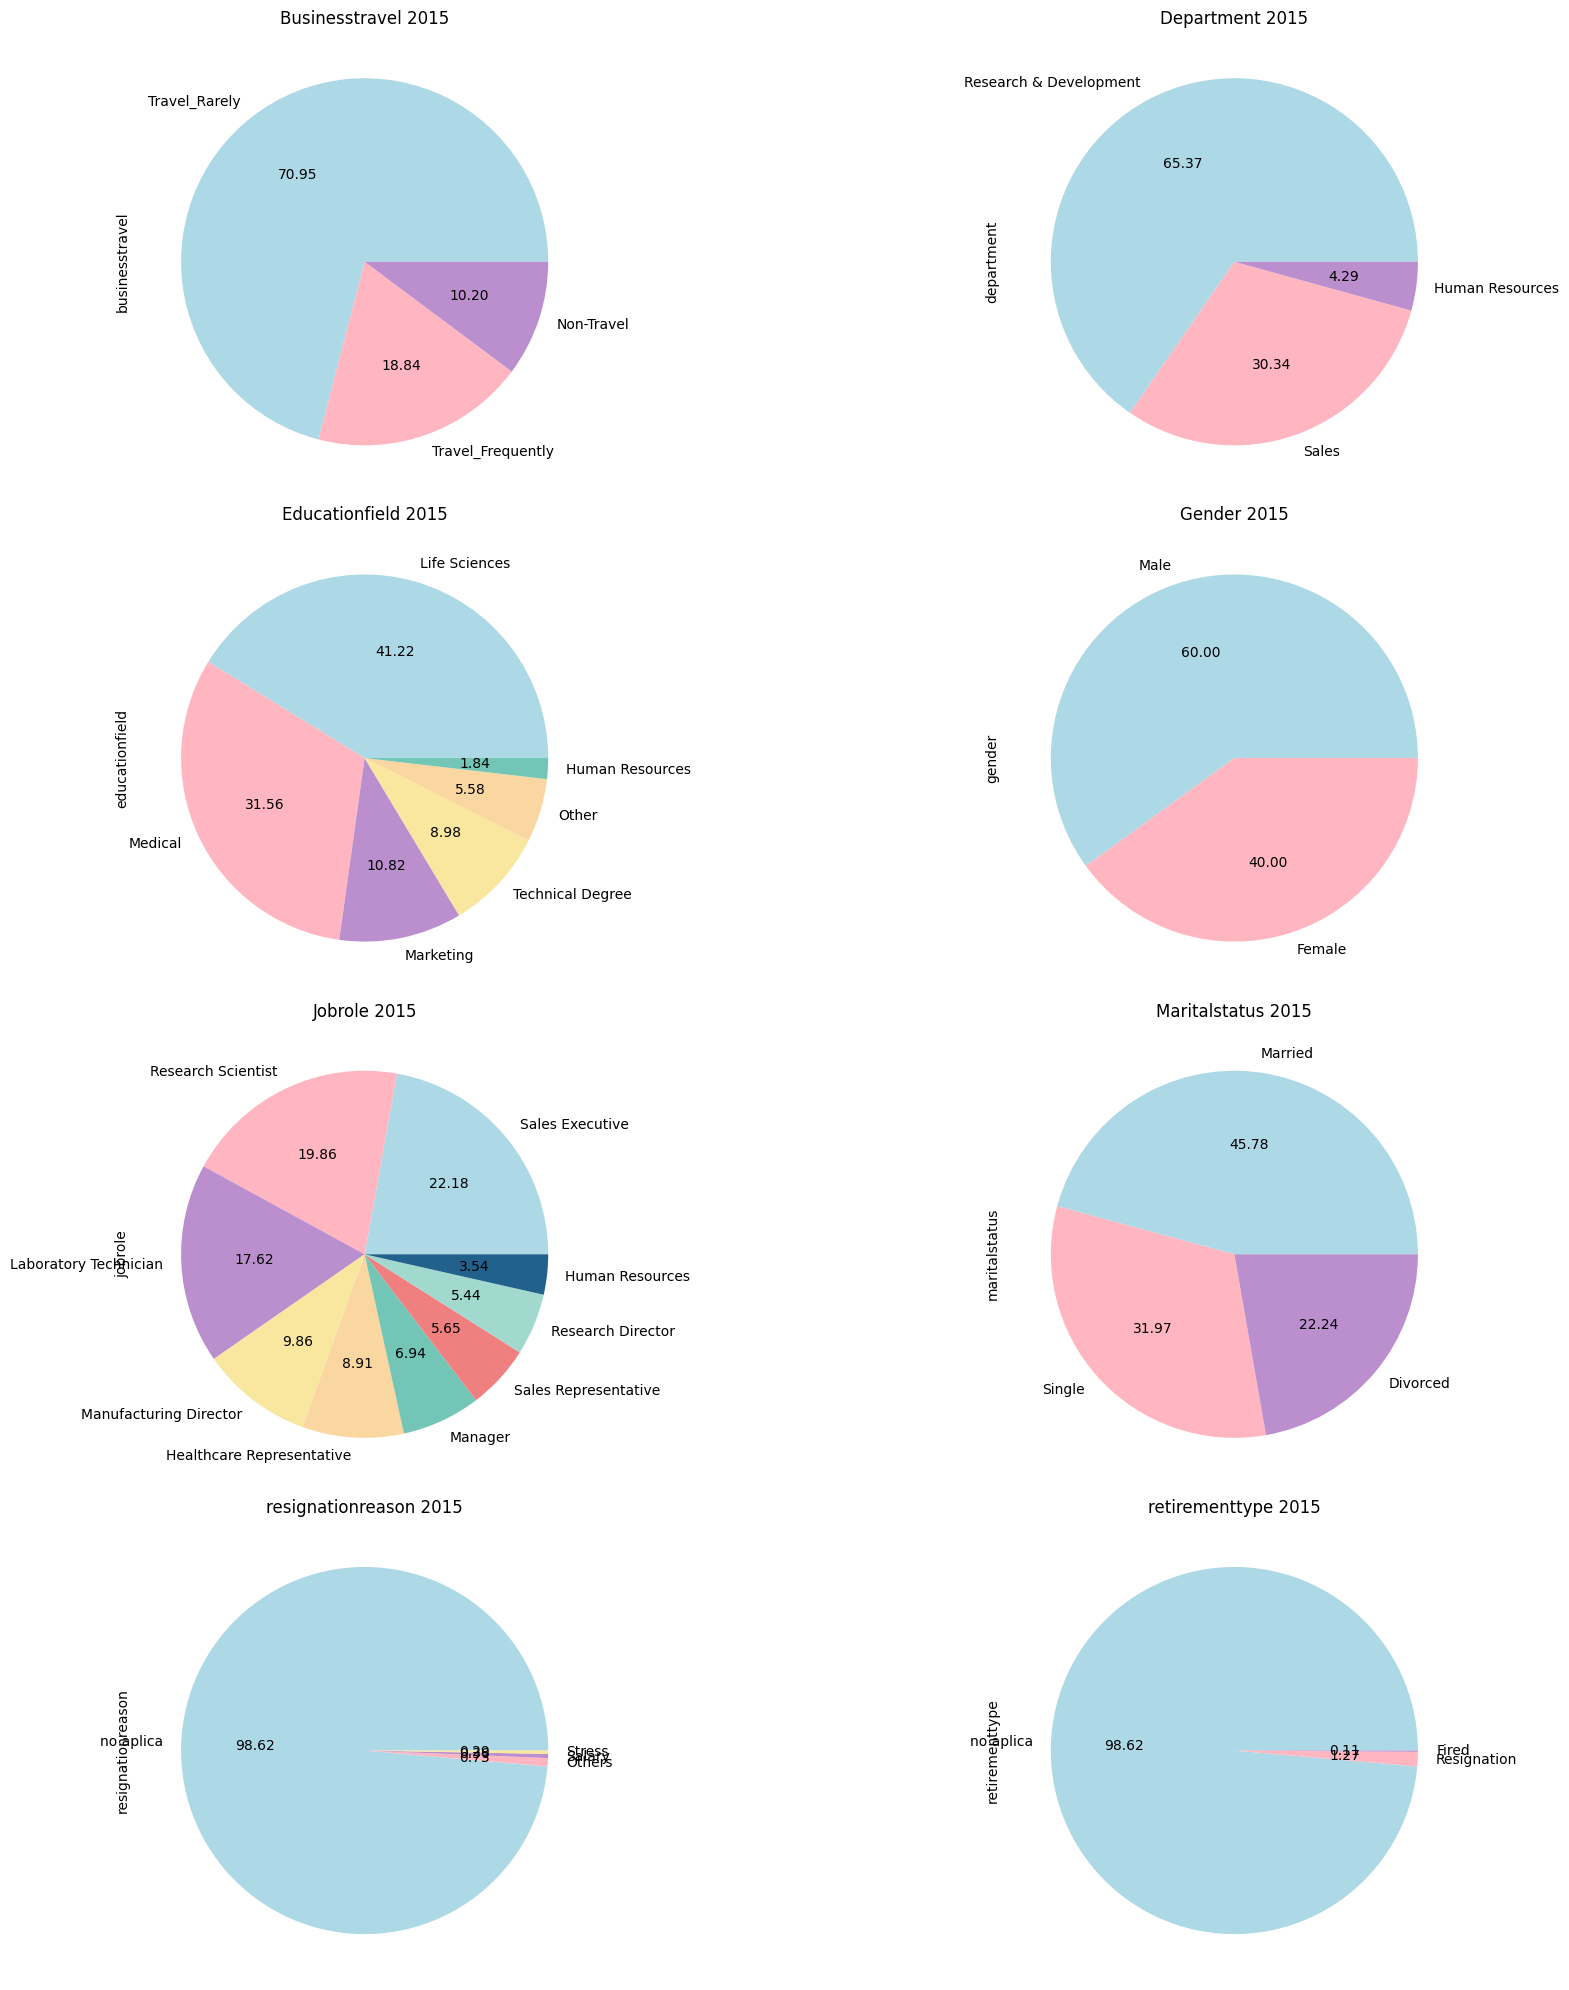

In [52]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# Gráfico de pastel para 'businesstravel' 2015
r_2015['businesstravel'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[0, 0])
axes[0, 0].set_title('Businesstravel 2015')

# Gráfico de pastel para 'department' 2015
r_2015['department'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[0, 1])
axes[0, 1].set_title('Department 2015')

# Gráfico de pastel para 'educationfield' 2015
r_2015['educationfield'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6'], ax=axes[1, 0])
axes[1, 0].set_title('Educationfield 2015')

# Gráfico de pastel para 'gender' 2015
r_2015['gender'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink'], ax=axes[1, 1])
axes[1, 1].set_title('Gender 2015')

# Gráfico de pastel para 'jobrole' 2015
r_2015['jobrole'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6','#F08080','#A2D9CE','#21618C'], ax=axes[2, 0])
axes[2, 0].set_title('Jobrole 2015')

# Gráfico de pastel para 'maritalstatus' 2015
r_2015['maritalstatus'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[2, 1])
axes[2, 1].set_title('Maritalstatus 2015')

# Gráfico de pastel para 'resignationreason' 2015
r_2015['resignationreason'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6'], ax=axes[3, 0])
axes[3, 0].set_title('resignationreason 2015')

# Gráfico de pastel para 'retirementtype' 2015
r_2015['retirementtype'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6'], ax=axes[3, 1])
axes[3, 1].set_title('retirementtype 2015')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

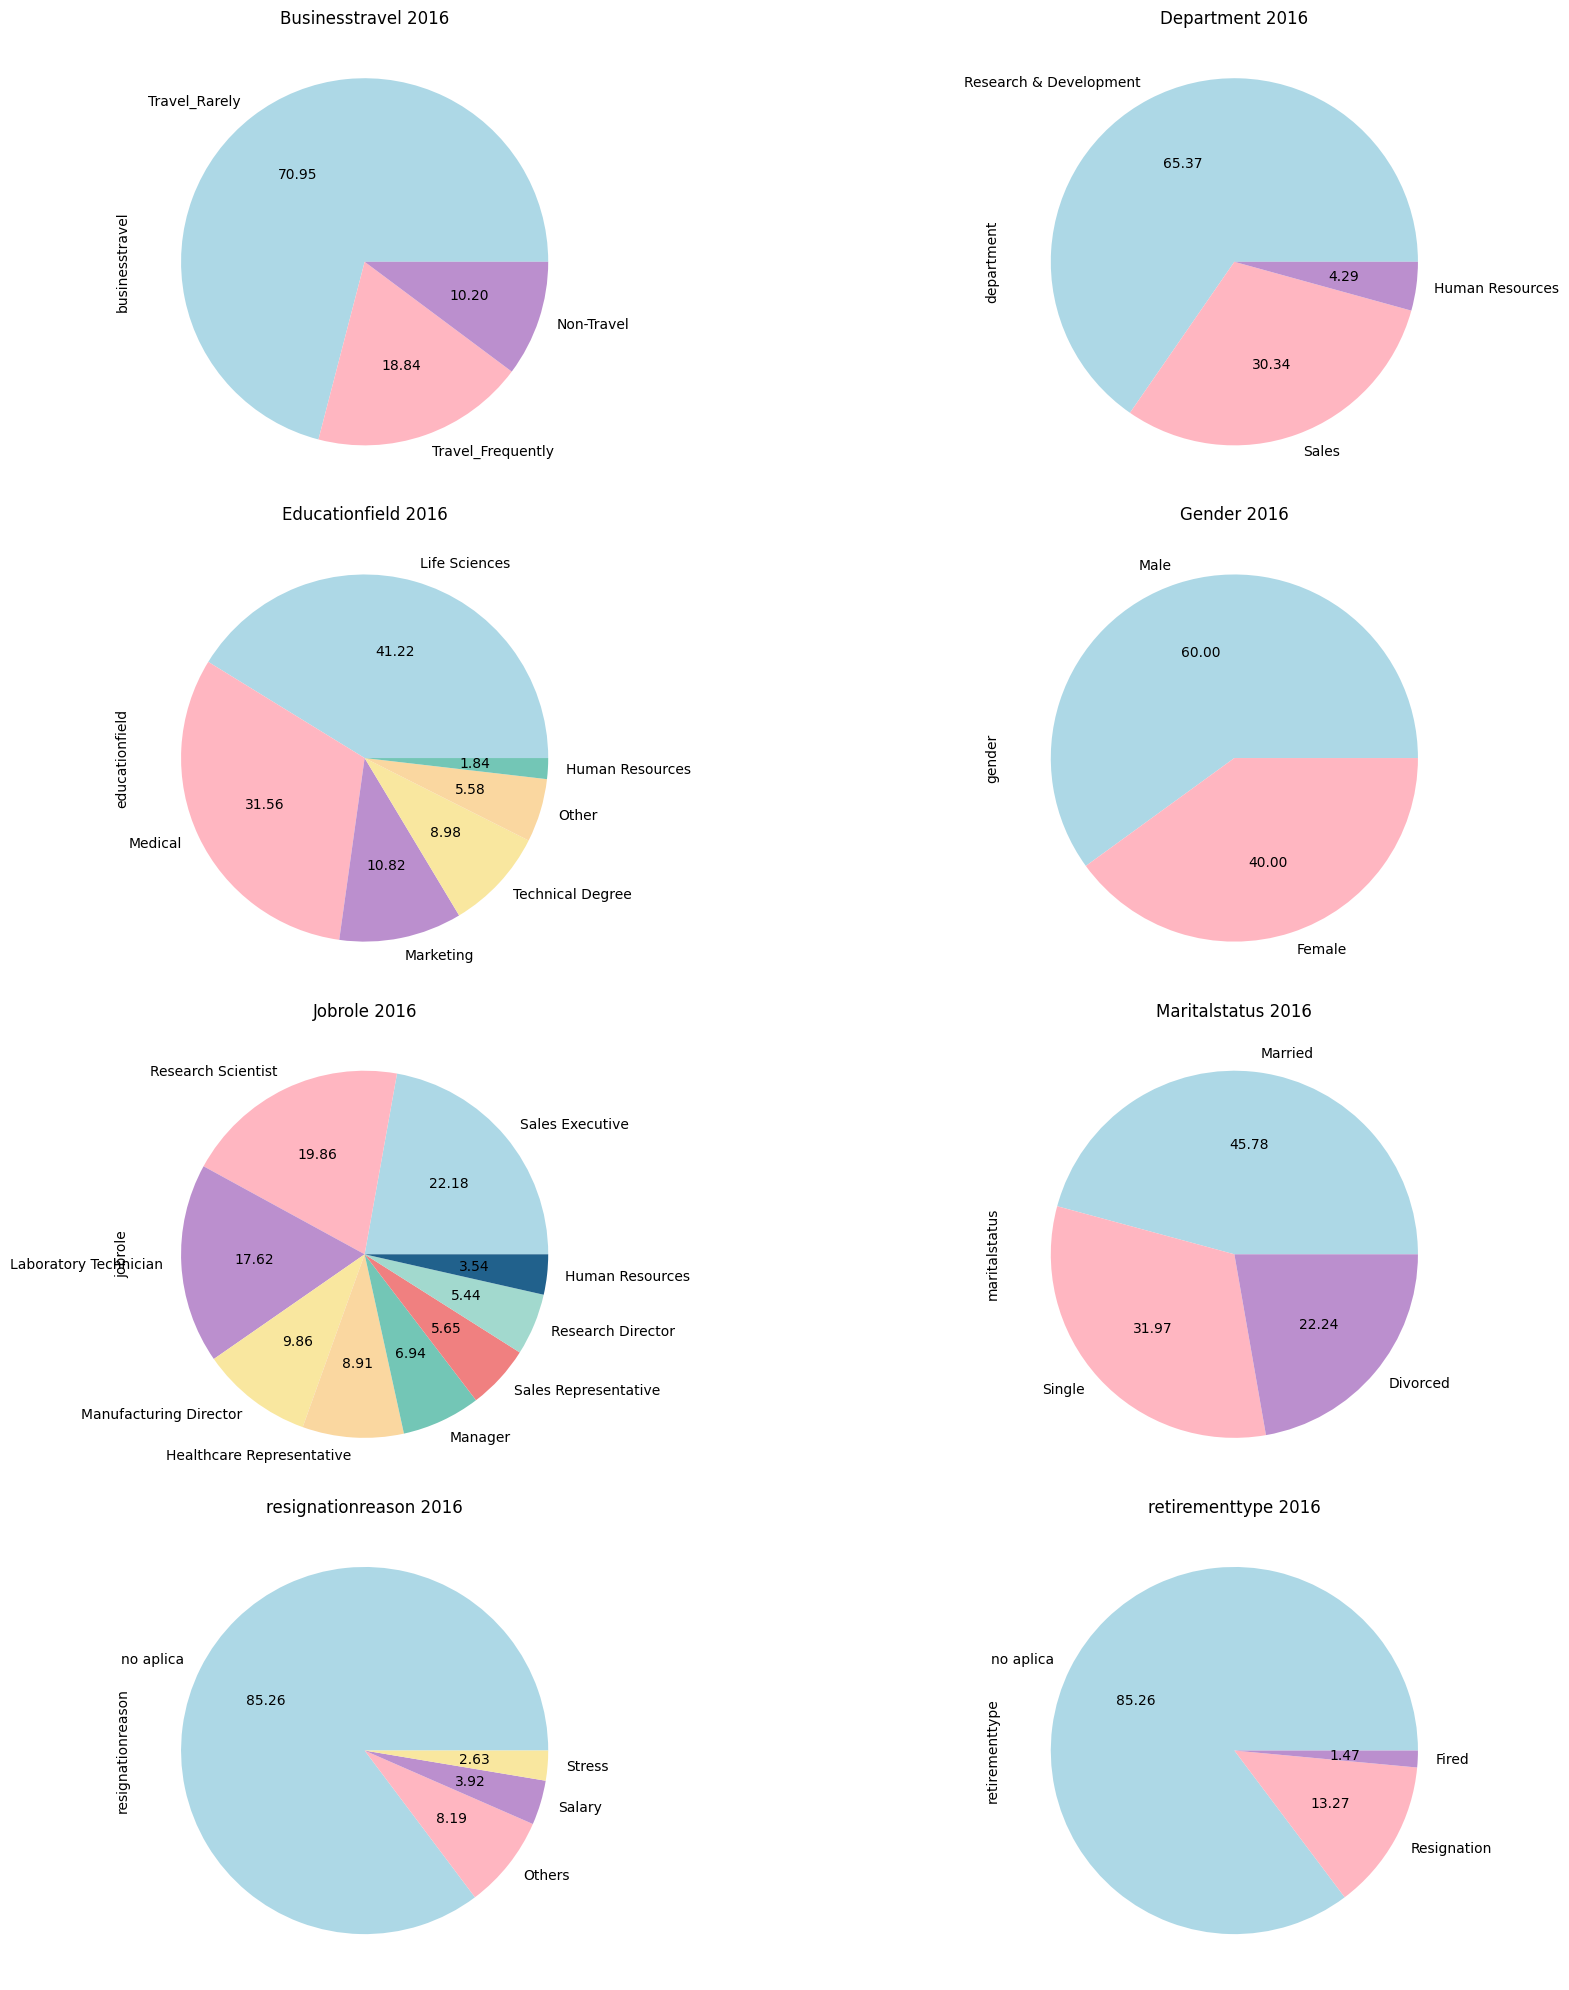

In [53]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# Gráfico de pastel para 'businesstravel' 2016
r_2016['businesstravel'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[0, 0])
axes[0, 0].set_title('Businesstravel 2016')

# Gráfico de pastel para 'department' 2016
r_2016['department'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[0, 1])
axes[0, 1].set_title('Department 2016')

# Gráfico de pastel para 'educationfield' 2016
r_2016['educationfield'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6'], ax=axes[1, 0])
axes[1, 0].set_title('Educationfield 2016')

# Gráfico de pastel para 'gender' 2016
r_2016['gender'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink'], ax=axes[1, 1])
axes[1, 1].set_title('Gender 2016')

# Gráfico de pastel para 'jobrole' 2016
r_2016['jobrole'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6','#F08080','#A2D9CE','#21618C'], ax=axes[2, 0])
axes[2, 0].set_title('Jobrole 2016')

# Gráfico de pastel para 'maritalstatus' 2016
r_2016['maritalstatus'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[2, 1])
axes[2, 1].set_title('Maritalstatus 2016')

# Gráfico de pastel para 'resignationreason' 2016
r_2016['resignationreason'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6'], ax=axes[3, 0])
axes[3, 0].set_title('resignationreason 2016')

# Gráfico de pastel para 'retirementtype' 2016
r_2016['retirementtype'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6'], ax=axes[3, 1])
axes[3, 1].set_title('retirementtype 2016')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

**Se sigue llenando la BD de las variables categóricas**

In [55]:
ttt2015=pd.concat([X_object2015["jobrole"],X_object2015["maritalstatus"],X_object2015["gender"],X_object2015["department"],X_object2015["educationfield"],X_object2015["businesstravel"],X_object2015["retirementtype"],X_object2015["resignationreason"]],axis=1)#concatenar las variables categoricas que se encuentran en X_object
ttt2015=ttt2015.astype(str)# se cambia el tipo de datos a string
ttt2015=pd.get_dummies(ttt2015)# se convirten a dummies
X_object_t2015=pd.concat([X_object2015, ttt2015], axis=1)#concatenamos categoricas con objeto

#veamos las categorias de estas variables
print("Categorias de jobrole: ", X_object2015["jobrole"].unique())
print("Categorias de maritalstatus: ", X_object2015["maritalstatus"].unique())
print("Categorias de gender: ", X_object2015["gender"].unique())
print("Categorias de department: ", X_object2015["educationfield"].unique())
print("Categorias de department: ", X_object2015["department"].unique())
print("Categorias de busisnesstravel: ", X_object2015["businesstravel"].unique())
print("Categorias de department: ", X_object2015["retirementtype"].unique())
print("Categorias de department: ", X_object2015["resignationreason"].unique())


Categorias de jobrole:  ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
Categorias de maritalstatus:  ['Married' 'Single' 'Divorced']
Categorias de gender:  ['Female' 'Male']
Categorias de department:  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Categorias de department:  ['Sales' 'Research & Development' 'Human Resources']
Categorias de busisnesstravel:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Categorias de department:  ['no aplica' 'Resignation' 'Fired']
Categorias de department:  ['no aplica' 'Others' 'Salary' 'Stress']


In [56]:
ttt2016=pd.concat([X_object2016["jobrole"],X_object2016["maritalstatus"],X_object2016["gender"],X_object2016["department"],X_object2016["educationfield"],X_object2016["businesstravel"],X_object2016["retirementtype"],X_object2016["resignationreason"]],axis=1)#concatenar las variables categoricas que se encuentran en X_object
ttt2016=ttt2016.astype(str)# se cambia el tipo de datos a string
ttt2016=pd.get_dummies(ttt2016)# se convirten a dummies
X_object_t2016=pd.concat([X_object2016, ttt2016], axis=1)#concatenamos categoricas con objeto

#veamos las categorias de estas variables
print("Categorias de jobrole: ", X_object2016["jobrole"].unique())
print("Categorias de maritalstatus: ", X_object2016["maritalstatus"].unique())
print("Categorias de gender: ", X_object2016["gender"].unique())
print("Categorias de department: ", X_object2016["educationfield"].unique())
print("Categorias de department: ", X_object2016["department"].unique())
print("Categorias de busisnesstravel: ", X_object2016["businesstravel"].unique())
print("Categorias de department: ", X_object2016["retirementtype"].unique())
print("Categorias de department: ", X_object2016["resignationreason"].unique())

Categorias de jobrole:  ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
Categorias de maritalstatus:  ['Married' 'Single' 'Divorced']
Categorias de gender:  ['Female' 'Male']
Categorias de department:  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Categorias de department:  ['Sales' 'Research & Development' 'Human Resources']
Categorias de busisnesstravel:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Categorias de department:  ['no aplica' 'Resignation' 'Fired']
Categorias de department:  ['no aplica' 'Others' 'Stress' 'Salary']


In [57]:
#Se eliminan las variables originales para cambiarlas por las dummies

X_object_t2015.drop(["maritalstatus","gender","department","businesstravel","target","educationfield","jobrole","retirementtype","resignationreason"], axis = 1, inplace = True)#eliminación de variables categoricas y las objeto
X_object_t2016.drop(["maritalstatus","gender","department","businesstravel","target","educationfield","jobrole","retirementtype","resignationreason"], axis = 1, inplace = True)#eliminación de variables categoricas y las objeto

In [58]:
X_object_t2016.info() #Se hace consulta para corroborar los cambios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   jobrole_Healthcare Representative  4410 non-null   uint8
 1   jobrole_Human Resources            4410 non-null   uint8
 2   jobrole_Laboratory Technician      4410 non-null   uint8
 3   jobrole_Manager                    4410 non-null   uint8
 4   jobrole_Manufacturing Director     4410 non-null   uint8
 5   jobrole_Research Director          4410 non-null   uint8
 6   jobrole_Research Scientist         4410 non-null   uint8
 7   jobrole_Sales Executive            4410 non-null   uint8
 8   jobrole_Sales Representative       4410 non-null   uint8
 9   maritalstatus_Divorced             4410 non-null   uint8
 10  maritalstatus_Married              4410 non-null   uint8
 11  maritalstatus_Single               4410 non-null   uint8
 12  gender_Female       

**Se identifican las variables categóricas que están como tipo float**

In [59]:
X_float2015 = r_2015.select_dtypes(include=['float64'])#se crea copia donde aparazcan las variables de tipo float
X_float2016 = r_2016.select_dtypes(include=['float64'])#se crea copia donde aparazcan las variables de tipo float
X_float2015

,environmentsatisfaction,jobsatisfaction,worklifebalance,numcompaniesworked,totalworkingyears
0,3.0,4.0,2.0,1.0,1.0
1,3.0,2.0,4.0,0.0,6.0
2,2.0,2.0,1.0,1.0,5.0
3,4.0,4.0,3.0,3.0,13.0
4,4.0,1.0,3.0,4.0,9.0
...,...,...,...,...,...
4405,4.0,1.0,3.0,3.0,10.0
4406,4.0,4.0,3.0,2.0,10.0
4407,1.0,3.0,3.0,0.0,5.0
4408,4.0,1.0,3.0,0.0,10.0


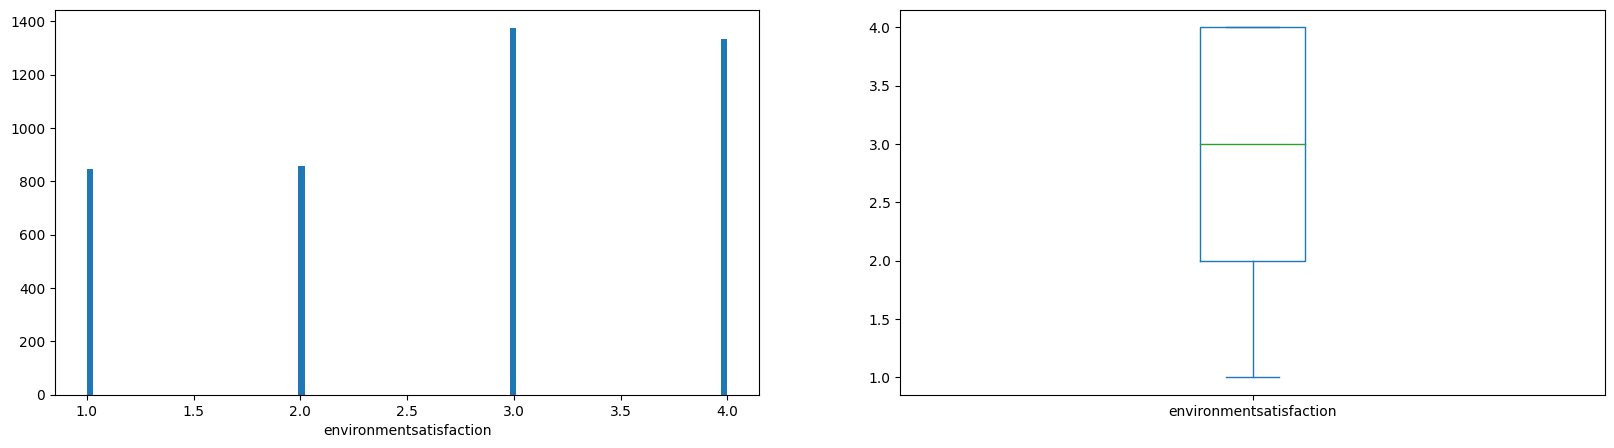

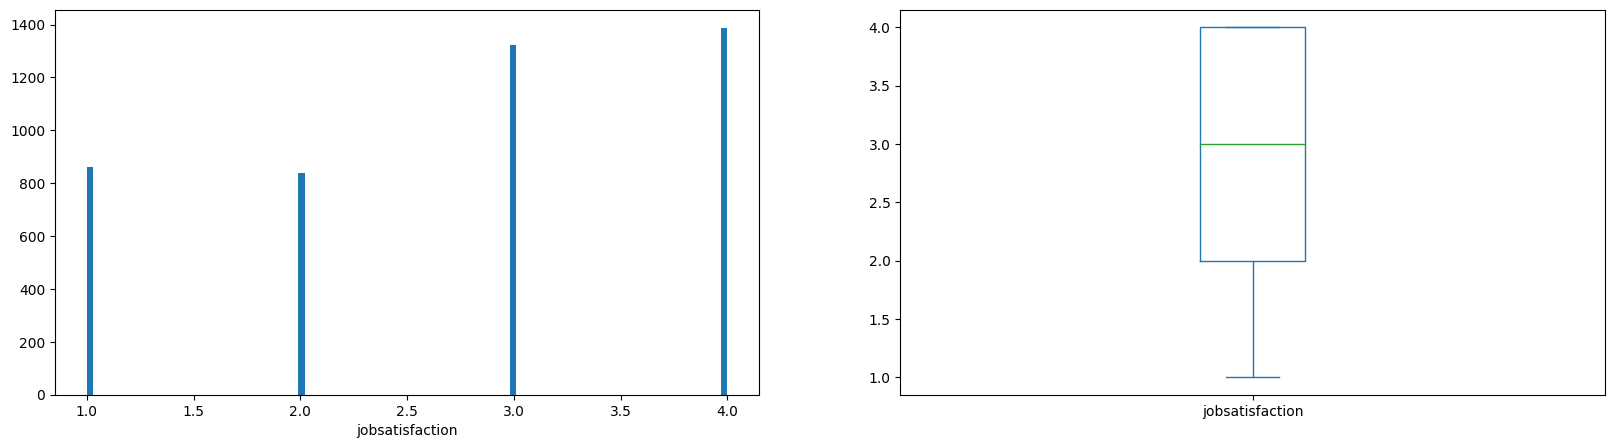

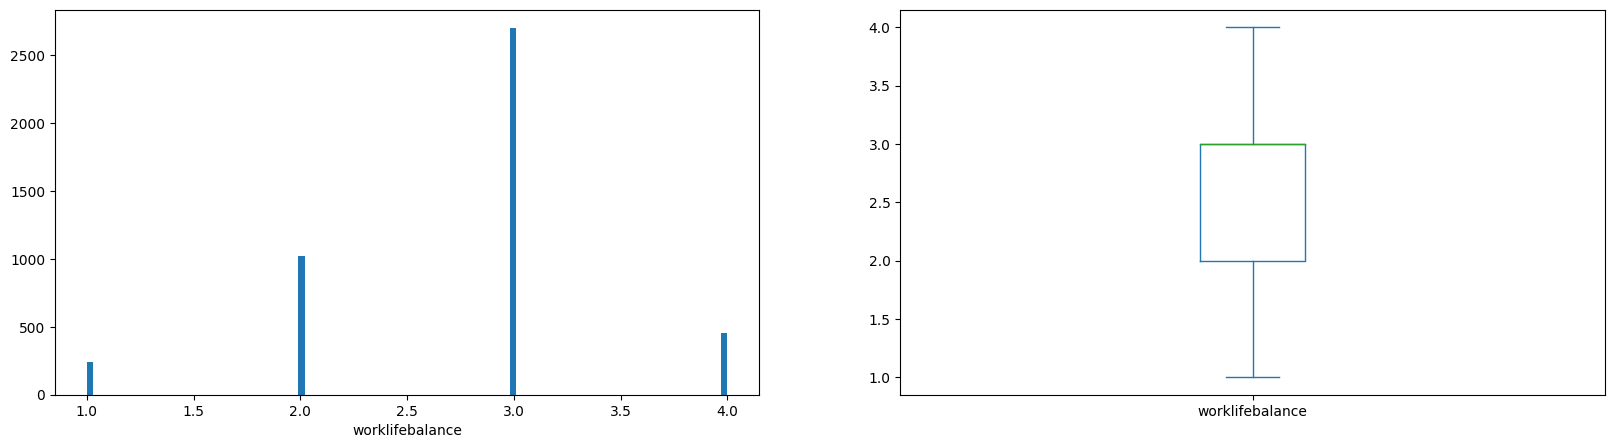

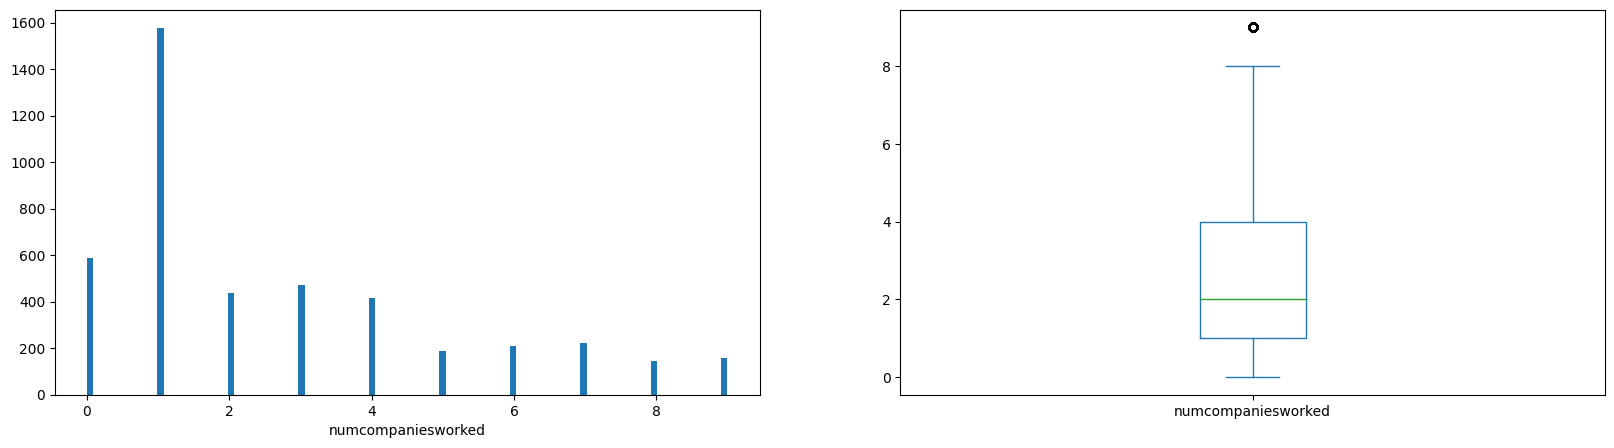

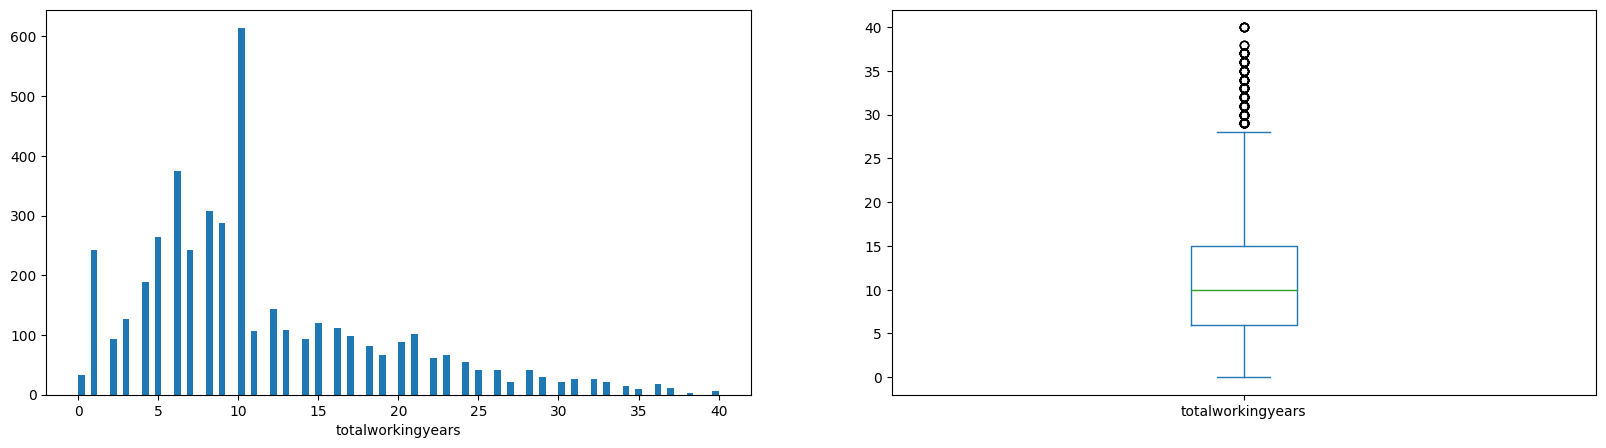

In [50]:
for variable in X_float2015: # se crea graficos para las variables float
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_float2015[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_float2015[variable].plot(kind='box')

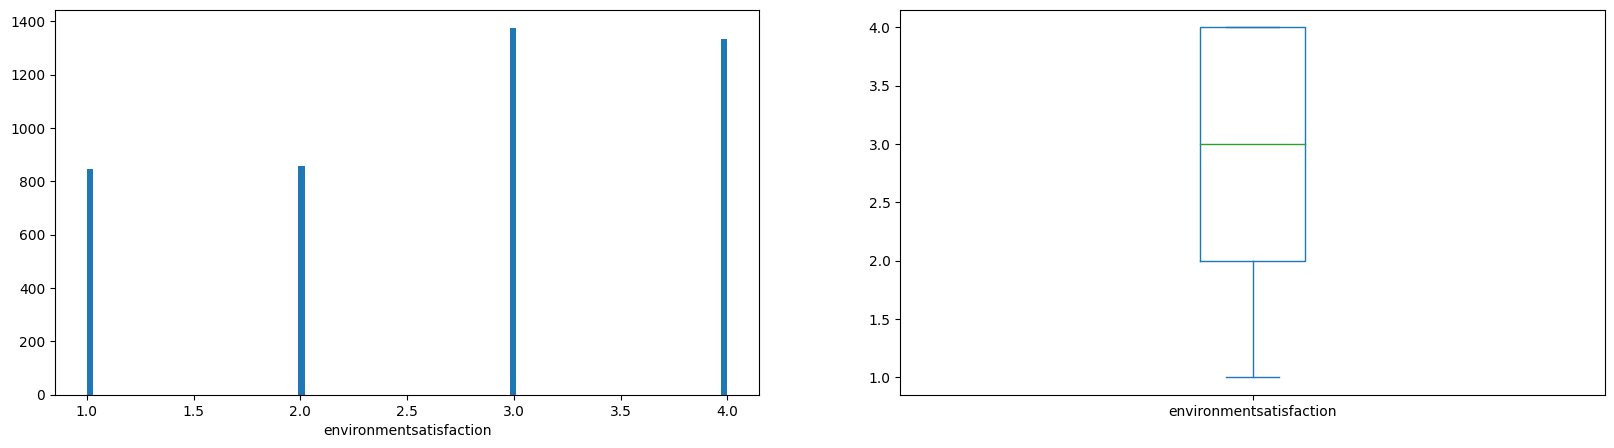

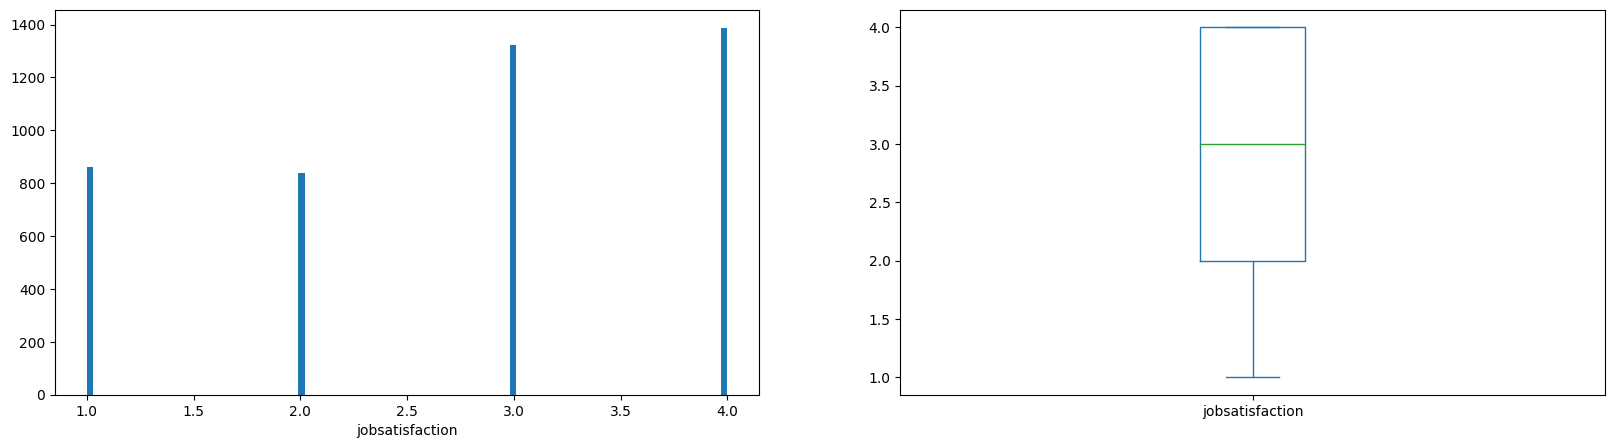

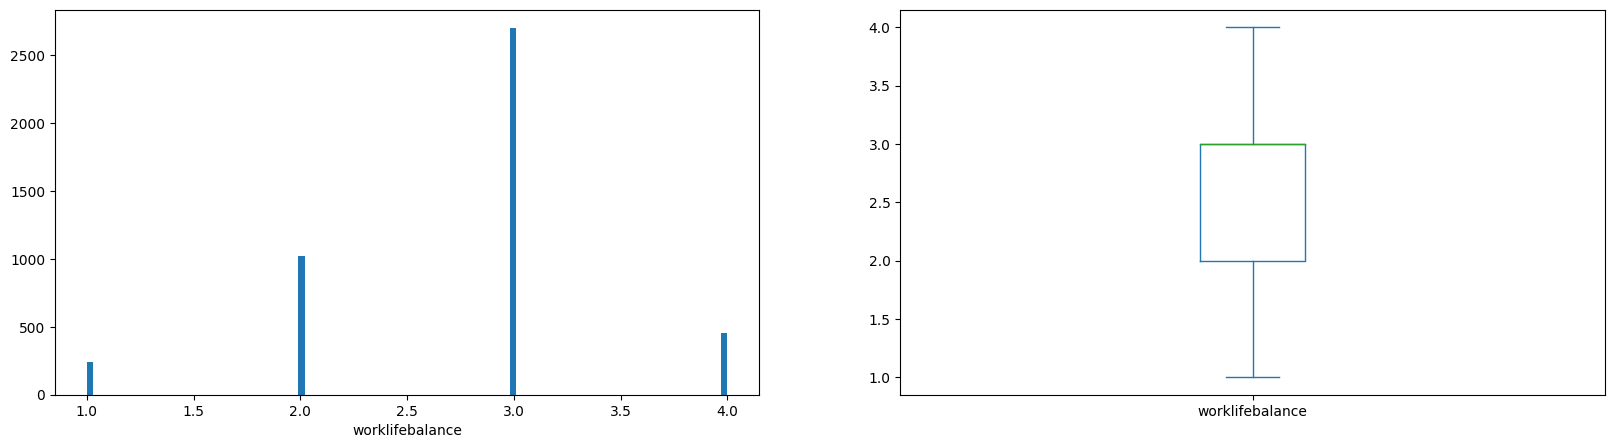

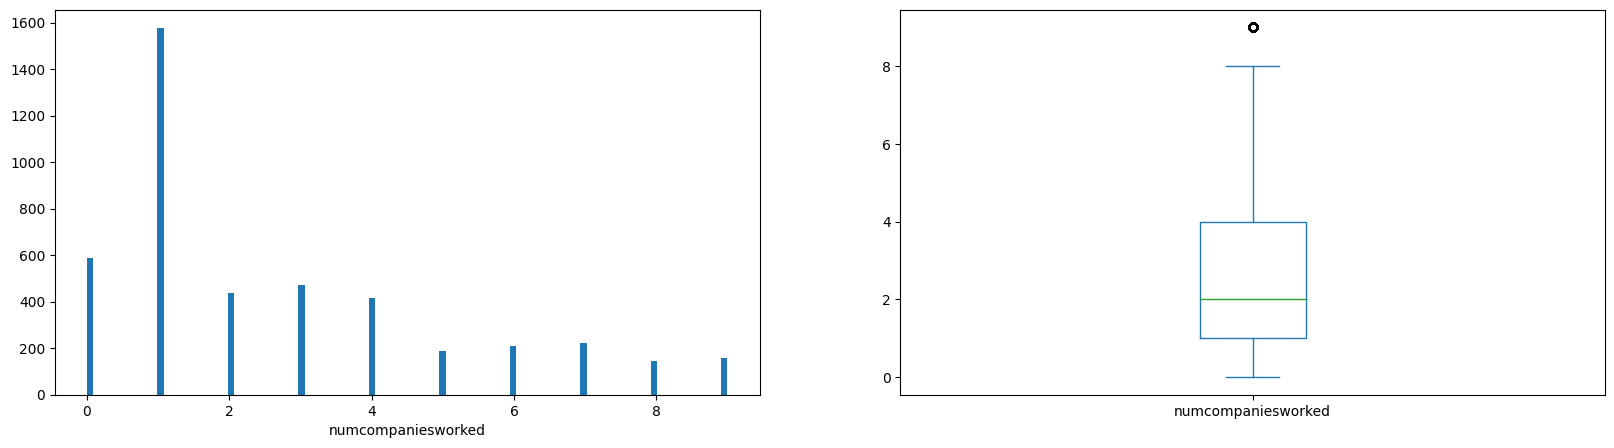

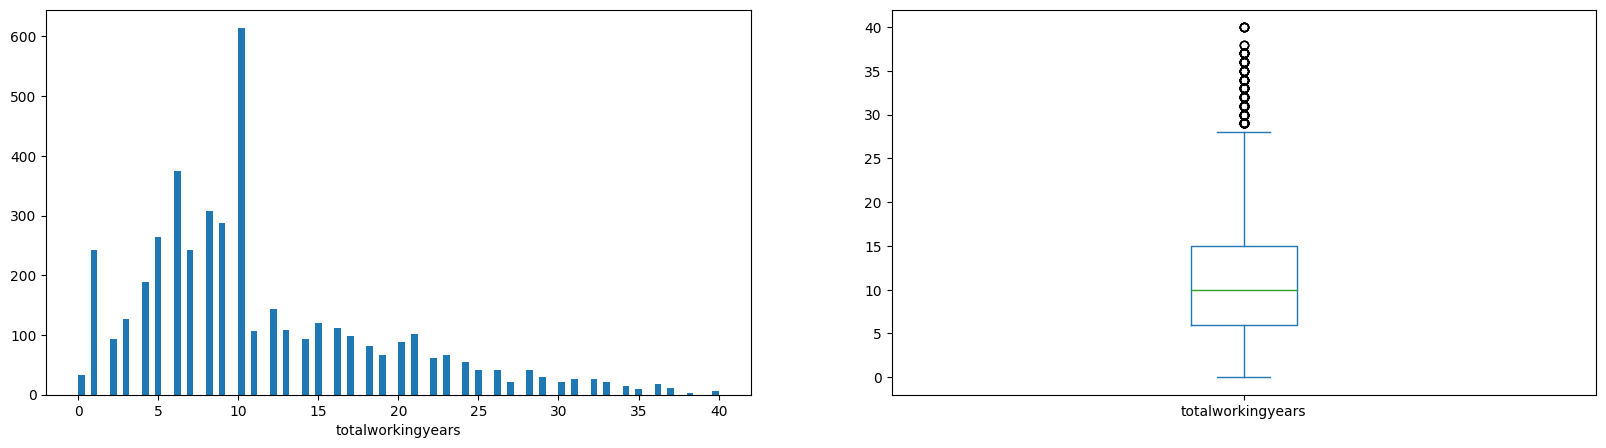

In [60]:
for variable in X_float2016: # se crea graficos para las variables float
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_float2016[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_float2016[variable].plot(kind='box')

**Se identifica desde las gráficas que las variables "environmentsatisfaction", "jobsatisfaction", "worklifebalance" se comportan como categóricas**

In [61]:
tt2015=pd.concat([X_float2015["environmentsatisfaction"],X_float2015["jobsatisfaction"],X_float2015["worklifebalance"]],axis=1)
tt2015=tt2015.astype(str)
tt2015=pd.get_dummies(tt2015)
X_object_t2015=pd.concat([X_object_t2015, tt2015], axis=1)

#Se eliminan las variables que se pasaron a categoricas
X_float2015.drop(["environmentsatisfaction","jobsatisfaction","worklifebalance"], axis = 1, inplace = True)


In [62]:
tt2016=pd.concat([X_float2016["environmentsatisfaction"],X_float2016["jobsatisfaction"],X_float2016["worklifebalance"]],axis=1)
tt2016=tt2016.astype(str)
tt2016=pd.get_dummies(tt2016)
X_object_t2016=pd.concat([X_object_t2016, tt2016], axis=1)

#Se eliminan las variables que se pasaron a categoricas
X_float2016.drop(["environmentsatisfaction","jobsatisfaction","worklifebalance"], axis = 1, inplace = True)


In [63]:
X_object_t2015.info() # Se consulta para corroborar los cambios realizados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   jobrole_Healthcare Representative  4410 non-null   uint8
 1   jobrole_Human Resources            4410 non-null   uint8
 2   jobrole_Laboratory Technician      4410 non-null   uint8
 3   jobrole_Manager                    4410 non-null   uint8
 4   jobrole_Manufacturing Director     4410 non-null   uint8
 5   jobrole_Research Director          4410 non-null   uint8
 6   jobrole_Research Scientist         4410 non-null   uint8
 7   jobrole_Sales Executive            4410 non-null   uint8
 8   jobrole_Sales Representative       4410 non-null   uint8
 9   maritalstatus_Divorced             4410 non-null   uint8
 10  maritalstatus_Married              4410 non-null   uint8
 11  maritalstatus_Single               4410 non-null   uint8
 12  gender_Female       

In [64]:
X_object_t2016.info() # Se consulta para corroborar los cambios realizados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   jobrole_Healthcare Representative  4410 non-null   uint8
 1   jobrole_Human Resources            4410 non-null   uint8
 2   jobrole_Laboratory Technician      4410 non-null   uint8
 3   jobrole_Manager                    4410 non-null   uint8
 4   jobrole_Manufacturing Director     4410 non-null   uint8
 5   jobrole_Research Director          4410 non-null   uint8
 6   jobrole_Research Scientist         4410 non-null   uint8
 7   jobrole_Sales Executive            4410 non-null   uint8
 8   jobrole_Sales Representative       4410 non-null   uint8
 9   maritalstatus_Divorced             4410 non-null   uint8
 10  maritalstatus_Married              4410 non-null   uint8
 11  maritalstatus_Single               4410 non-null   uint8
 12  gender_Female       

In [ ]:
X_float2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   numcompaniesworked  4410 non-null   float64
 1   totalworkingyears   4410 non-null   float64
dtypes: float64(2)
memory usage: 69.0 KB


##**CONCATENACIÓN DE BD**

**Se concatenan sólo las BD de 2015 que ya son estás las que van a servir para realizar el entrenamiento de los modelos en pasos posteriores**

In [65]:
X_total2015=pd.concat([X_int2015, X_float2015, X_object_t2015], axis=1)
X_total2015.head()

,age,distancefromhome,monthlyincome,percentsalaryhike,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,numcompaniesworked,totalworkingyears,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,gender_Female,gender_Male,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,businesstravel_Non-Travel,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,retirementtype_Fired,retirementtype_Resignation,retirementtype_no aplica,resignationreason_Others,resignationreason_Salary,resignationreason_Stress,resignationreason_no aplica,environmentsatisfaction_1.0,environmentsatisfaction_2.0,environmentsatisfaction_3.0,environmentsatisfaction_4.0,jobsatisfaction_1.0,jobsatisfaction_2.0,jobsatisfaction_3.0,jobsatisfaction_4.0,worklifebalance_1.0,worklifebalance_2.0,worklifebalance_3.0,worklifebalance_4.0
0,51,6,131160,11,6,1,0,0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,31,10,41890,23,3,5,1,4,0.0,6.0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
2,32,17,193280,15,2,5,0,3,1.0,5.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
3,38,2,83210,11,5,8,7,5,3.0,13.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,32,10,23420,12,2,6,0,4,4.0,9.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0


**Separación de datos de entrenamiento y testeo**

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_total2015, y2016, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset, corresponden al 80,20
print("Tamaño del conjunto de entrenamiento. X: ", X_train.shape," Y: ", y_train.shape)
print("Tamaño del conjunto de validación. X: ", X_test.shape," Y: ", y_test.shape )

#Nombre de caracteristicas númericas
#numeric_columns=list(X_total.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([( "std_numericas",MinMaxScaler() , X_total2015.columns)], remainder='passthrough')

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento. X:  (3528, 55)  Y:  (3528,)
Tamaño del conjunto de validación. X:  (882, 55)  Y:  (882,)


**Métodos de selección de variables - Lasso**

**El primer selector de variables que se utiliza es el Lasso con un Alpha de 0.01**

In [67]:
# Configurar el selector de variables con Lasso
lasso_sel = SelectFromModel(Lasso(alpha=0.01),max_features=15)

# Ajustar el selector a los datos de entrenamiento
lasso_sel.fit(X_train, y_train)

# Imprimir los coeficientes del estimador Lasso
lasso_coef = lasso_sel.estimator_.coef_
print("Coeficientes del estimador Lasso:", lasso_coef)

# Obtener las variables seleccionadas
X_var = lasso_sel.get_support()
print("Variables seleccionadas:", X_var )

# Crear un DataFrame de pandas con las variables seleccionadas y sus nombres
selected_features_df = pd.DataFrame({
    'Feature': lasso_coef,
    'Selected': X_var
})

# Imprimir el DataFrame
print(selected_features_df)

# Filtrar X_train y X_test para mantener solo las variables seleccionadas
X_var_train = X_train[:, X_var]
X_var_test = X_test[:, X_var]

Coeficientes del estimador Lasso: [-0.01899644 -0.         -0.          0.         -0.         -0.
 -0.         -0.02270421  0.         -0.01035558 -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
 -0.         -0.         -0.          0.08036828 -0.          0.
  0.         -0.         -0.          0.          0.         -0.
  0.         -0.         -0.         -0.          0.0220281  -0.
 -0.         -0.          0.         -0.         -0.         -0.
  0.          0.0402899  -0.         -0.         -0.          0.02675902
  0.         -0.         -0.02365644  0.         -0.         -0.00197569
  0.        ]
Variables seleccionadas: [ True False False False False False False  True False  True False False
 False False False False False False False False False  True False False
 False False False False False False False False False False  True False
 False False False False False False False  True False False False  True
 False False  True False False  Tr

In [69]:
#Se guardan los arreglos con las variables que sugiere el selector

np.save('X_var_train.npy', X_var_train)
np.save('X_var_test.npy', X_var_test)

**selector de variables basados en importancia de las variables en modelos**

In [70]:
#Se crea una función que le da importancia a las variables de acuerdo al modelo que se va a usar

def feature_importance_comparison(r_2015):

    # Divide los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_total2015, y2016, test_size=0.2, random_state=42)

    # Inicializa 2 modelos
    rf_model = RandomForestClassifier(random_state=42)
    dt_model = DecisionTreeClassifier(random_state=42)

    # Entrena los modelos
    rf_model.fit(X_train, y_train)
    dt_model.fit(X_train, y_train)

    # Calcula la importancia de las características para cada modelo
    rf_feature_importances = rf_model.feature_importances_
    #lr_feature_importances = abs(lr_model.coef_[0])
    dt_feature_importances = dt_model.feature_importances_

    # Crea DataFrames para visualizar la importancia de las características
    rf_feature_importance_df = pd.DataFrame({
        'Feature': X_total2015.columns,
        'Random Forest Importance': rf_feature_importances
    }).sort_values(by='Random Forest Importance', ascending=False)

    dt_feature_importance_df = pd.DataFrame({
        'Feature': X_total2015.columns,
        'Decision Tree Importance': dt_feature_importances
    }).sort_values(by='Decision Tree Importance', ascending=False)

    # Combina los DataFrames en uno solo
    feature_importance_comparison_df = rf_feature_importance_df.merge(dt_feature_importance_df, on='Feature')

    return feature_importance_comparison_df

#Se aplica a la BD original
feature_importance_comparison_df = feature_importance_comparison(r_2015)
print(feature_importance_comparison_df.to_string(index=False))

                          Feature  Random Forest Importance  Decision Tree Importance
                              age                  0.085114                  0.101526
                totalworkingyears                  0.075246                  0.102087
                    monthlyincome                  0.073373                  0.072091
                   yearsatcompany                  0.058173                  0.073285
                 distancefromhome                  0.054739                  0.037012
                percentsalaryhike                  0.052838                  0.050528
               numcompaniesworked                  0.045066                  0.044158
             yearswithcurrmanager                  0.044399                  0.013062
          yearssincelastpromotion                  0.037492                  0.026551
            trainingtimeslastyear                  0.034429                  0.056330
             maritalstatus_Single                  0.0

In [73]:
#Se eligen sólo las variables que tengan un puntaje de 0.01 en adelante

var_imp_dtc = feature_importance_comparison_df[feature_importance_comparison_df['Decision Tree Importance'] > 0.01]

# Imprime el DataFrame filtrado
print(var_imp_dtc)

                             Feature  Random Forest Importance  \
0                                age                  0.085114   
1                  totalworkingyears                  0.075246   
2                      monthlyincome                  0.073373   
3                     yearsatcompany                  0.058173   
4                   distancefromhome                  0.054739   
5                  percentsalaryhike                  0.052838   
6                 numcompaniesworked                  0.045066   
7               yearswithcurrmanager                  0.044399   
8            yearssincelastpromotion                  0.037492   
9              trainingtimeslastyear                  0.034429   
10              maritalstatus_Single                  0.021202   
11       environmentsatisfaction_1.0                  0.018542   
12               jobsatisfaction_1.0                  0.017699   
13  businesstravel_Travel_Frequently                  0.016245   
14        

In [74]:
selected_features = var_imp_dtc['Feature'].tolist()

# Filtra el DataFrame original para mantener solo las características seleccionadas
var_imp_dtc = X_total2015[selected_features]

In [75]:
y2016= pd.DataFrame(y2016, columns=['target'])

In [76]:
#Se guardan las BD para llamarlos en otros Scripts

var_imp_dtc.to_csv('var_imp_dtc.csv', index=False)
X_total2015.to_csv('X_total2015.csv', index=False)
y2016.to_csv('y2016.csv', index=False)